# **MINI CHALLENGE**

#Step 1: importing data from the kaggle

In [ ]:
!pip install kaggle
!kaggle datasets download -d devansodariya/student-performance-data

Dataset URL: https://www.kaggle.com/datasets/devansodariya/student-performance-data
License(s): CC0-1.0
  0% 0.00/7.16k [00:00<?, ?B/s]
100% 7.16k/7.16k [00:00<00:00, 7.66MB/s]


# Step 2: Unzipping the data

In [ ]:
!unzip /content/student-performance-data.zip

Archive:  /content/student-performance-data.zip
  inflating: student_data.csv        


# Step 3: Importing the necessary libraries

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from scipy import stats
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

# Plot styles to set aesthetic preferences for your visualizations.
sns.set()
plt.style.use('ggplot')

# Step 4: Loading data into python frames and showing first few rows of the dataset

In [ ]:
df = pd.read_csv('student_data.csv')
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

# Step 5: Understanding the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Rename The Dataset Features For Better Understanding
Here's a list of suggested more understandable feature names for the dataset:

| Original Column | Renamed Column         |  
|-----------------|------------------------|
| school          | School                 |
| sex             | Gender                 |
| age             | Age                    |
| address         | ResidenceArea          |
| famsize         | FamilySize             |
| Pstatus         | ParentsCohabitation     |
| Medu            | Mother'sEducation      |
| Fedu            | Father'sEducation      |
| Mjob            | Mother'sJob            |
| Fjob            | Father'sJob            |
| reason          | ReasonForChoosingSchool|
| guardian        | Guardian               |
| traveltime      | TravelTimeToSchool      |
| studytime       | WeeklyStudyTime         |
| failures        | PastFailures           |
| schoolsup       | SchoolSupport          |
| famsup          | FamilySupport          |
| paid            | ExtraPaidClasses        |
| activities      | ExtracurricularActivities|
| nursery         | AttendedNurserySchool   |
| higher          | WantsHigherEducation    |
| internet        | HasInternetAccess       |
| romantic        | InRomanticRelationship  |
| famrel          | FamilyRelationshipQuality|
| freetime        | FreeTimeAfterSchool     |
| goout           | GoingOutFrequency       |
| Dalc            | WorkdayAlcoholConsumption|
| Walc            | WeekendAlcoholConsumption|
| health          | HealthStatus           |
| absences        | SchoolAbsences          |
| G1              | FirstPeriodGrade        |
| G2              | SecondPeriodGrade       |
| G3              | FinalGrade              |

This naming scheme makes it easier to understand the meaning of each feature.

In [ ]:
# prompt: generate the code for renaming the columns usign the above table

new_column_names = {
    'school': 'School',
    'sex': 'Gender',
    'age': 'Age',
    'address': 'ResidenceArea',
    'famsize': 'FamilySize',
    'Pstatus': 'ParentsCohabitation',
    'Medu': 'Mother\'sEducation',
    'Fedu': 'Father\'sEducation',
    'Mjob': 'Mother\'sJob',
    'Fjob': 'Father\'sJob',
    'reason': 'ReasonForChoosingSchool',
    'guardian': 'Guardian',
    'traveltime': 'TravelTimeToSchool',
    'studytime': 'WeeklyStudyTime',
    'failures': 'PastFailures',
    'schoolsup': 'SchoolSupport',
    'famsup': 'FamilySupport',
    'paid': 'ExtraPaidClasses',
    'activities': 'ExtracurricularActivities',
    'nursery': 'AttendedNurserySchool',
    'higher': 'WantsHigherEducation',
    'internet': 'HasInternetAccess',
    'romantic': 'InRomanticRelationship',
    'famrel': 'FamilyRelationshipQuality',
    'freetime': 'FreeTimeAfterSchool',
    'goout': 'GoingOutFrequency',
    'Dalc': 'WorkdayAlcoholConsumption',
    'Walc': 'WeekendAlcoholConsumption',
    'health': 'HealthStatus',
    'absences': 'SchoolAbsences',
    'G1': 'FirstPeriodGrade',
    'G2': 'SecondPeriodGrade',
    'G3': 'FinalGrade'
}

df = df.rename(columns=new_column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   School                     395 non-null    object
 1   Gender                     395 non-null    object
 2   Age                        395 non-null    int64 
 3   ResidenceArea              395 non-null    object
 4   FamilySize                 395 non-null    object
 5   ParentsCohabitation        395 non-null    object
 6   Mother'sEducation          395 non-null    int64 
 7   Father'sEducation          395 non-null    int64 
 8   Mother'sJob                395 non-null    object
 9   Father'sJob                395 non-null    object
 10  ReasonForChoosingSchool    395 non-null    object
 11  Guardian                   395 non-null    object
 12  TravelTimeToSchool         395 non-null    int64 
 13  WeeklyStudyTime            395 non-null    int64 
 14  PastFailur

# Step 6: Data Preparation & Cleaning Checklist
1.   Missing Values
2.   Duplicate and Low Variation Data
3.   Incorrect and Irrelevant Data
4.   Categorical Data
5.   Outliers
6.   Feature Scaling
7.   Feature Engineering/Selection
8.   Validation Split



## **1. Missing Values**

In many cases, your chosen model or algorithm simply
won't know how to process missing values - and you will
be returned an error.

Even if the missing values don't lead to an error you do
always want to ensure that you are passing the model
the most useful information to learn from - and you
should consider whether missing values meet that criteria
or not.

The two most common approaches for dealing with
missing values:

**Removal:**
 Often you will simply remove any observations
(rows) where one or missing values are present. You can
also remove entire columns if no information is present.

**Imputation:**
 This is where you input or "impute"
replacement values where they were originally missing.
This can be based upon the column mean, median, or
most common value or more advanced approaches that
take into account other present data points to give an
estimation of what the missing value might be!

In [ ]:
# checking for the missing values
df.isnull().sum()

School                       0
Gender                       0
Age                          0
ResidenceArea                0
FamilySize                   0
ParentsCohabitation          0
Mother'sEducation            0
Father'sEducation            0
Mother'sJob                  0
Father'sJob                  0
ReasonForChoosingSchool      0
Guardian                     0
TravelTimeToSchool           0
WeeklyStudyTime              0
PastFailures                 0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
ExtracurricularActivities    0
AttendedNurserySchool        0
WantsHigherEducation         0
HasInternetAccess            0
InRomanticRelationship       0
FamilyRelationshipQuality    0
FreeTimeAfterSchool          0
GoingOutFrequency            0
WorkdayAlcoholConsumption    0
WeekendAlcoholConsumption    0
HealthStatus                 0
SchoolAbsences               0
FirstPeriodGrade             0
SecondPeriodGrade            0
FinalGrade                   0
dtype: int64

There is no missing value in the data.

## **2. Duplicate and Low Variation Data**
When looking through your data, don't just look for
missing values - keep an eye out for duplicate data, or
data that has low variation.

**Duplicate data** is most commonly rows of data that are
exactly the same across all columns. This duplicate rows
do not add anything to the learning process of the model
or algorithm, but do add storage & processing overhead.
In the vast majority of cases you can remove duplicate
rows prior to training your model.

**Low variation data** is where a column in your dataset
contain only one (or few) unique value(s).

### Data Duplication Checking

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(395, 33)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(395, 33)

The above cells shows that there is no duplication in the data. The number of rows before and after the drop of duplicated are same. So it is evident from the above cells that there is no duplication in the data.

### Low Variance Data Checking

Columns with low variation:
['School', 'Gender', 'ResidenceArea', 'FamilySize', 'ParentsCohabitation', 'ReasonForChoosingSchool', 'Guardian', 'TravelTimeToSchool', 'WeeklyStudyTime', 'PastFailures', 'SchoolSupport', 'FamilySupport', 'ExtraPaidClasses', 'ExtracurricularActivities', 'AttendedNurserySchool', 'WantsHigherEducation', 'HasInternetAccess', 'InRomanticRelationship']


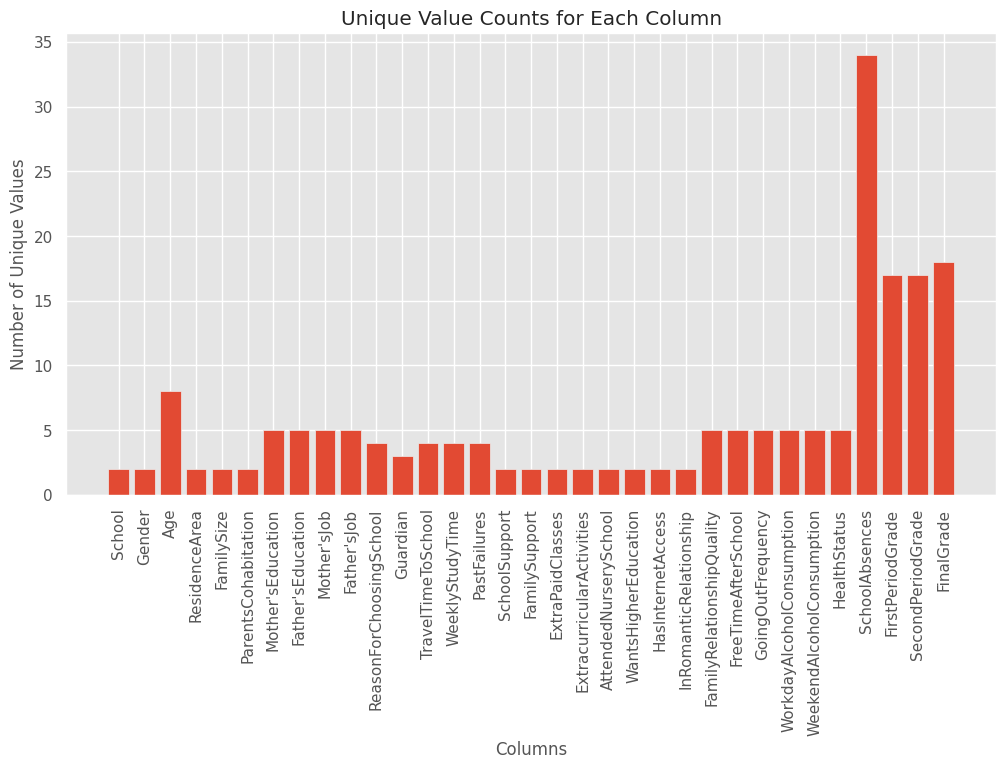

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df.nunique()

# Identify columns with low variation (e.g., fewer than 5 unique values)
low_variation_columns = unique_counts[unique_counts < 5].index.tolist()

print("Columns with low variation:")
print(low_variation_columns)

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()


We can ignore the columns with low variability because they are not caring too much information. But before dropping those columns lets do some further data analysis.

## **3. Incorrect and Irrelevant Data**


**Irrelevant data** is anything that isn’t related specifically
to the problem you’re looking to solve. For example, if
you're predicting house prices, but your dataset contains
commercial properties as well - these would need to be
removed.

**Incorrect data** can be hard to spot! An example could
be looking for values that shouldn’t be possible such a
negative house price values.

## **4. Categorical Data**

Generally speaking, ML models like being fed numerical
data. They are less fond of categorical data!

Categorical data is anything that is listed as groups,
classes, or text. A simple example would be a column for
gender which contains values of either "Male" or "Female".

Your model or algorithm won’t know how to assign some
numerical importance to these values, so you often want
to turn these groups or classes into numerical values.

A common approach is called One Hot Encoding where
you create new columns, one for each unique class in your
categorical column. You fill these new columns with
values of 1 or 0 depending on which is true for each
observation.

Other encoding techniques you can consider are; Label
Encoding, Binary Encoding, Target Encoding, Ordinal
Encoding, & Feature Hashing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   School                     395 non-null    object
 1   Gender                     395 non-null    object
 2   Age                        395 non-null    int64 
 3   ResidenceArea              395 non-null    object
 4   FamilySize                 395 non-null    object
 5   ParentsCohabitation        395 non-null    object
 6   Mother'sEducation          395 non-null    int64 
 7   Father'sEducation          395 non-null    int64 
 8   Mother'sJob                395 non-null    object
 9   Father'sJob                395 non-null    object
 10  ReasonForChoosingSchool    395 non-null    object
 11  Guardian                   395 non-null    object
 12  TravelTimeToSchool         395 non-null    int64 
 13  WeeklyStudyTime            395 non-null    int64 
 14  PastFailur

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, dummy_na=False)

# Print the encoded DataFrame
df_encoded.head()


Age  Mother'sEducation  Father'sEducation  TravelTimeToSchool  \
0   18                  4                  4                   2   
1   17                  1                  1                   1   
2   15                  1                  1                   1   
3   15                  4                  2                   1   
4   16                  3                  3                   1   

   WeeklyStudyTime  PastFailures  FamilyRelationshipQuality  \
0                2             0                          4   
1                2             0                          5   
2                2             3                          4   
3                3             0                          3   
4                2             0                          4   

   FreeTimeAfterSchool  GoingOutFrequency  WorkdayAlcoholConsumption  ...  \
0                    3                  4                          1  ...   
1                    3                  3                          1  ...   
2                    3                  2                          2  ...   
3                    2                  2                          1  ...   
4                    3                  2                          1  ...   

   ExtracurricularActivities_no  ExtracurricularActivities_yes  \
0                          True                          False   
1                          True                          False   
2                          True                          False   
3                         False                           True   
4                          True                          False   

   AttendedNurserySchool_no  AttendedNurserySchool_yes  \
0                     False                       True   
1                      True                      False   
2                     False                       True   
3                     False                       True   
4                     False                       True   

   WantsHigherEducation_no  WantsHigherEducation_yes  HasInternetAccess_no  \
0                    False                      True                  True   
1                    False                      True                 False   
2                    False                      True                 False   
3                    False                      True                 False   
4                    False                      True                  True   

   HasInternetAccess_yes  InRomanticRelationship_no  \
0                  False                       True   
1                   True                       True   
2                   True                       True   
3                   True                      False   
4                  False                       True   

   InRomanticRelationship_yes  
0                       False  
1                       False  
2                       False  
3                        True  
4                       False  

[5 rows x 59 columns]

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 395 non-null    int64
 1   Mother'sEducation                   395 non-null    int64
 2   Father'sEducation                   395 non-null    int64
 3   TravelTimeToSchool                  395 non-null    int64
 4   WeeklyStudyTime                     395 non-null    int64
 5   PastFailures                        395 non-null    int64
 6   FamilyRelationshipQuality           395 non-null    int64
 7   FreeTimeAfterSchool                 395 non-null    int64
 8   GoingOutFrequency                   395 non-null    int64
 9   WorkdayAlcoholConsumption           395 non-null    int64
 10  WeekendAlcoholConsumption           395 non-null    int64
 11  HealthStatus                        395 non-null    int64
 12  SchoolAb

**Before one hot encoding, we have**

* dtypes: int64(16), object(17)
* memory usage: 102.0+ KB

**After one hot encodign , we have**

* dtypes: bool(43), int64(16)
* memory usage: 66.1 KB

**Benefit Of One Hot Encoding:**

The categorical data is converted into numerical values that helps in data processing. Also it has reduced the memory usage required for storing values as object datatypes.

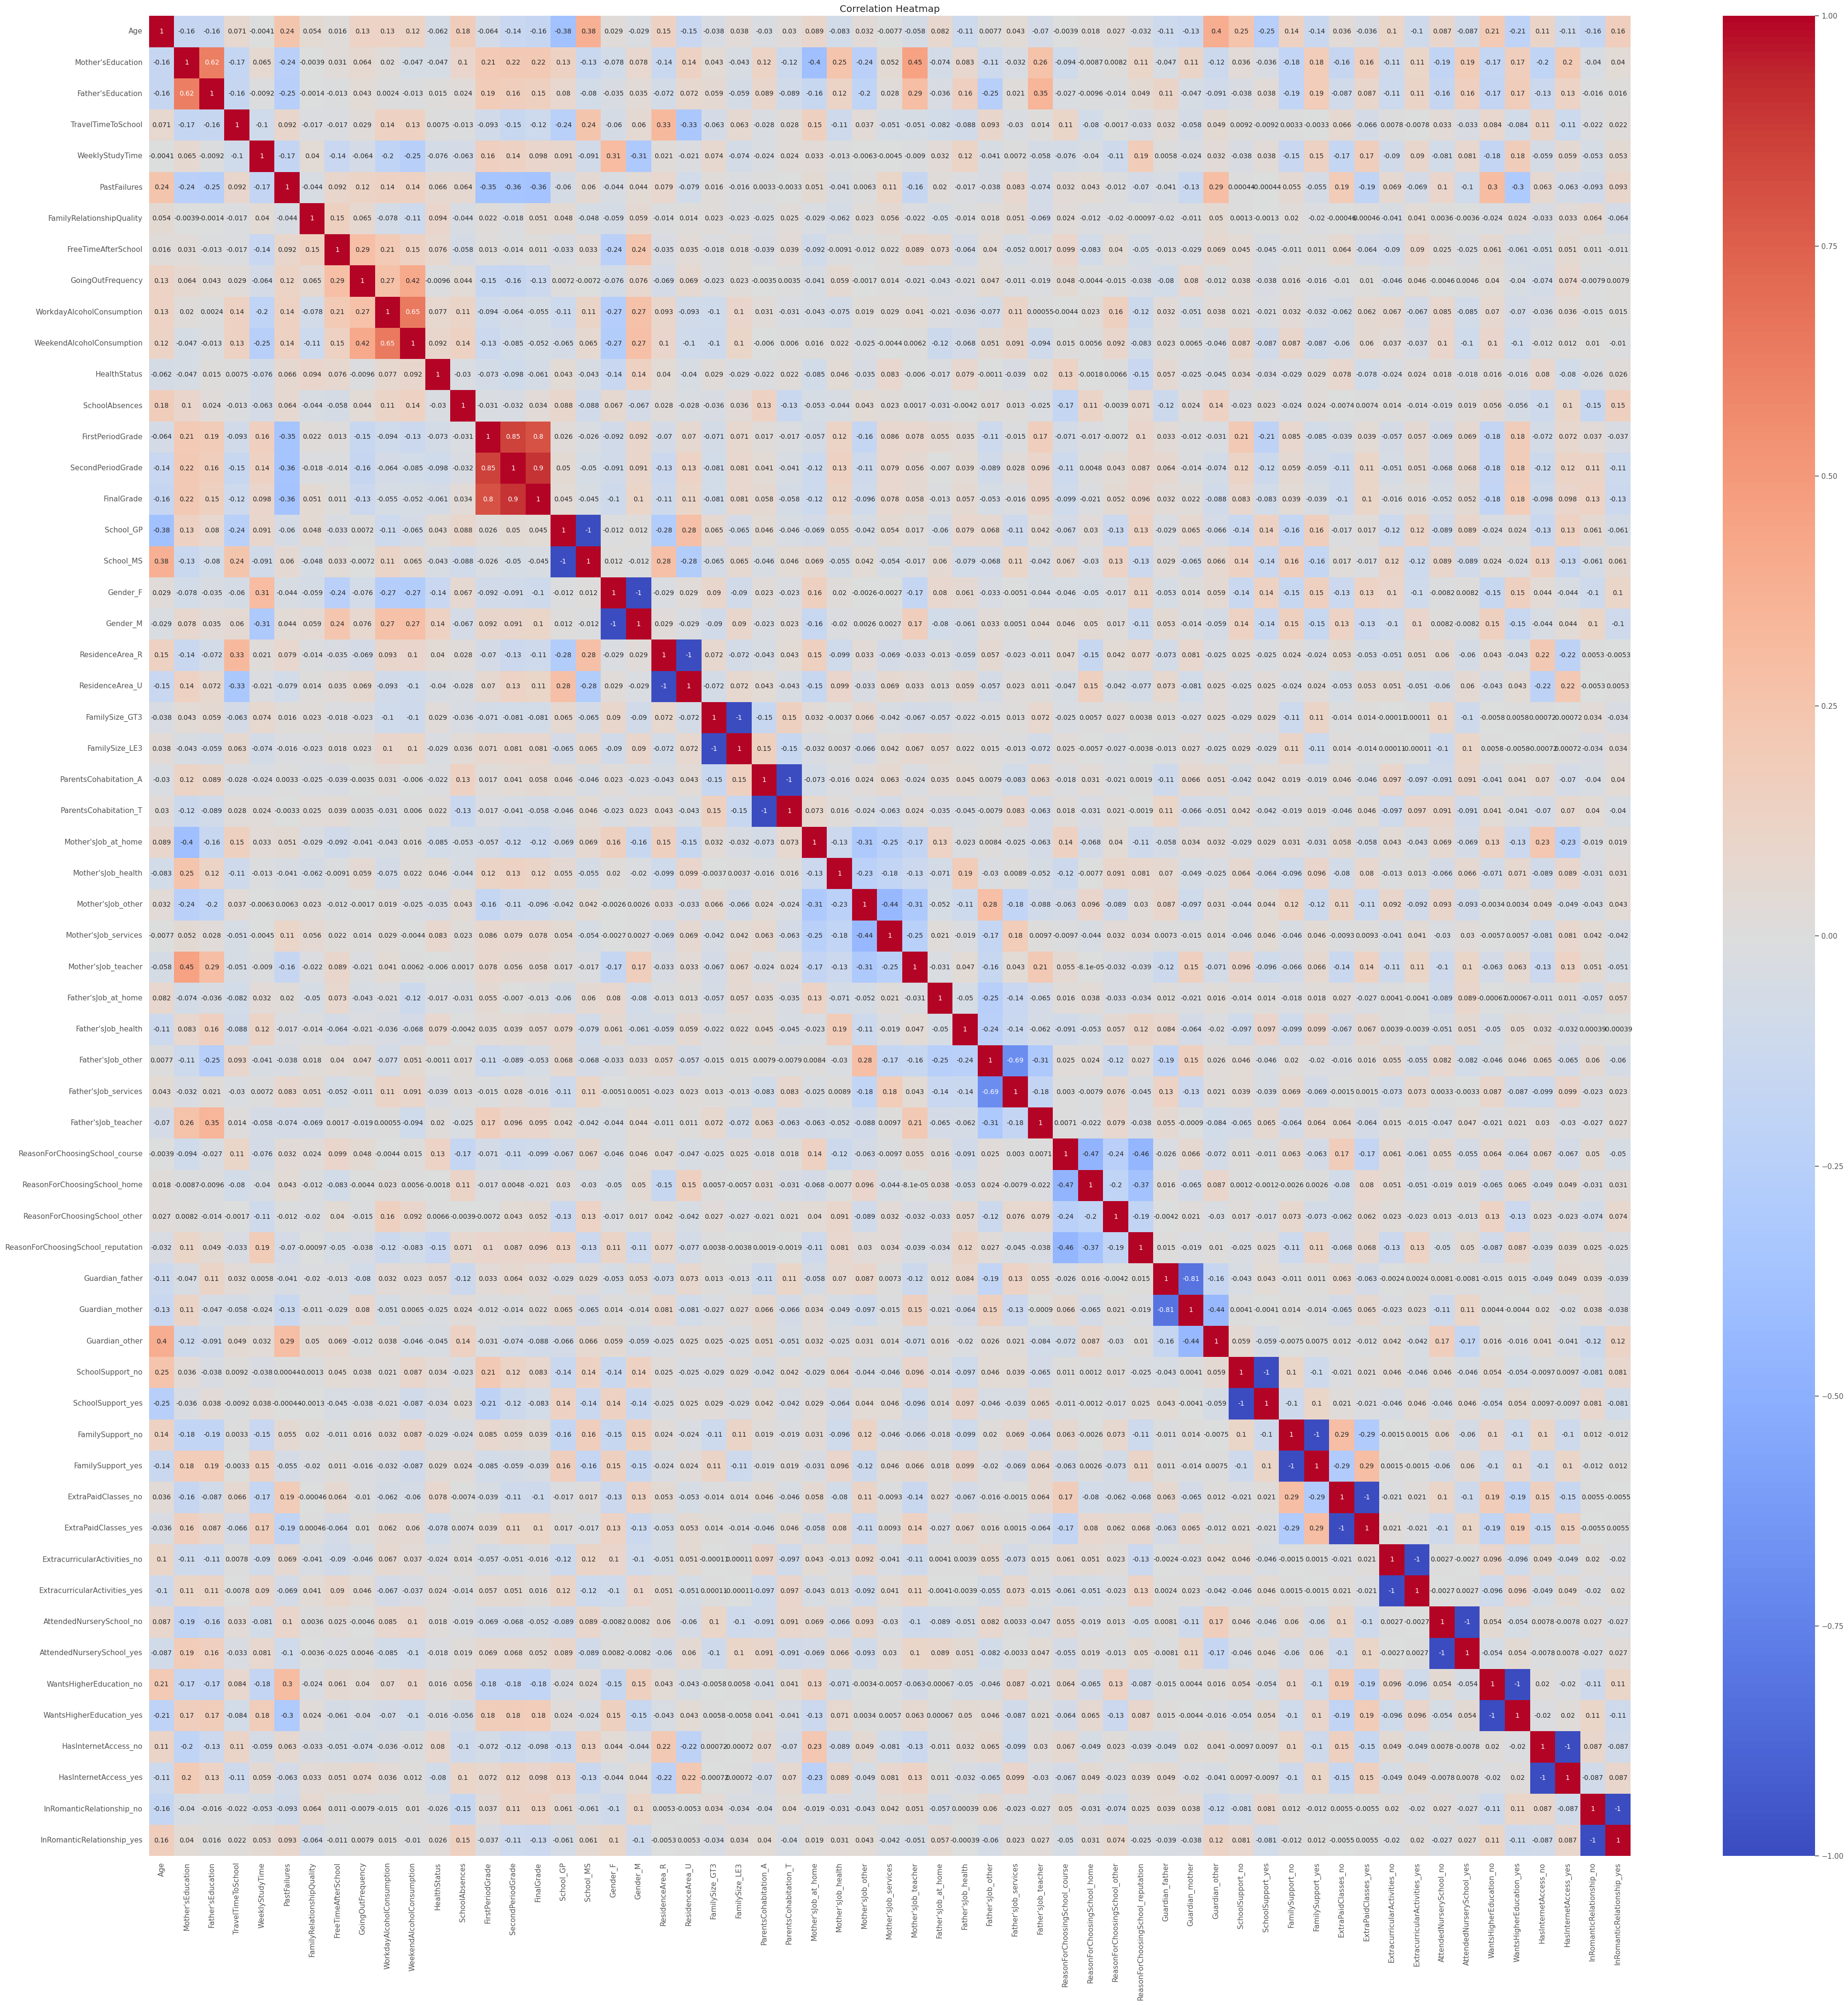

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

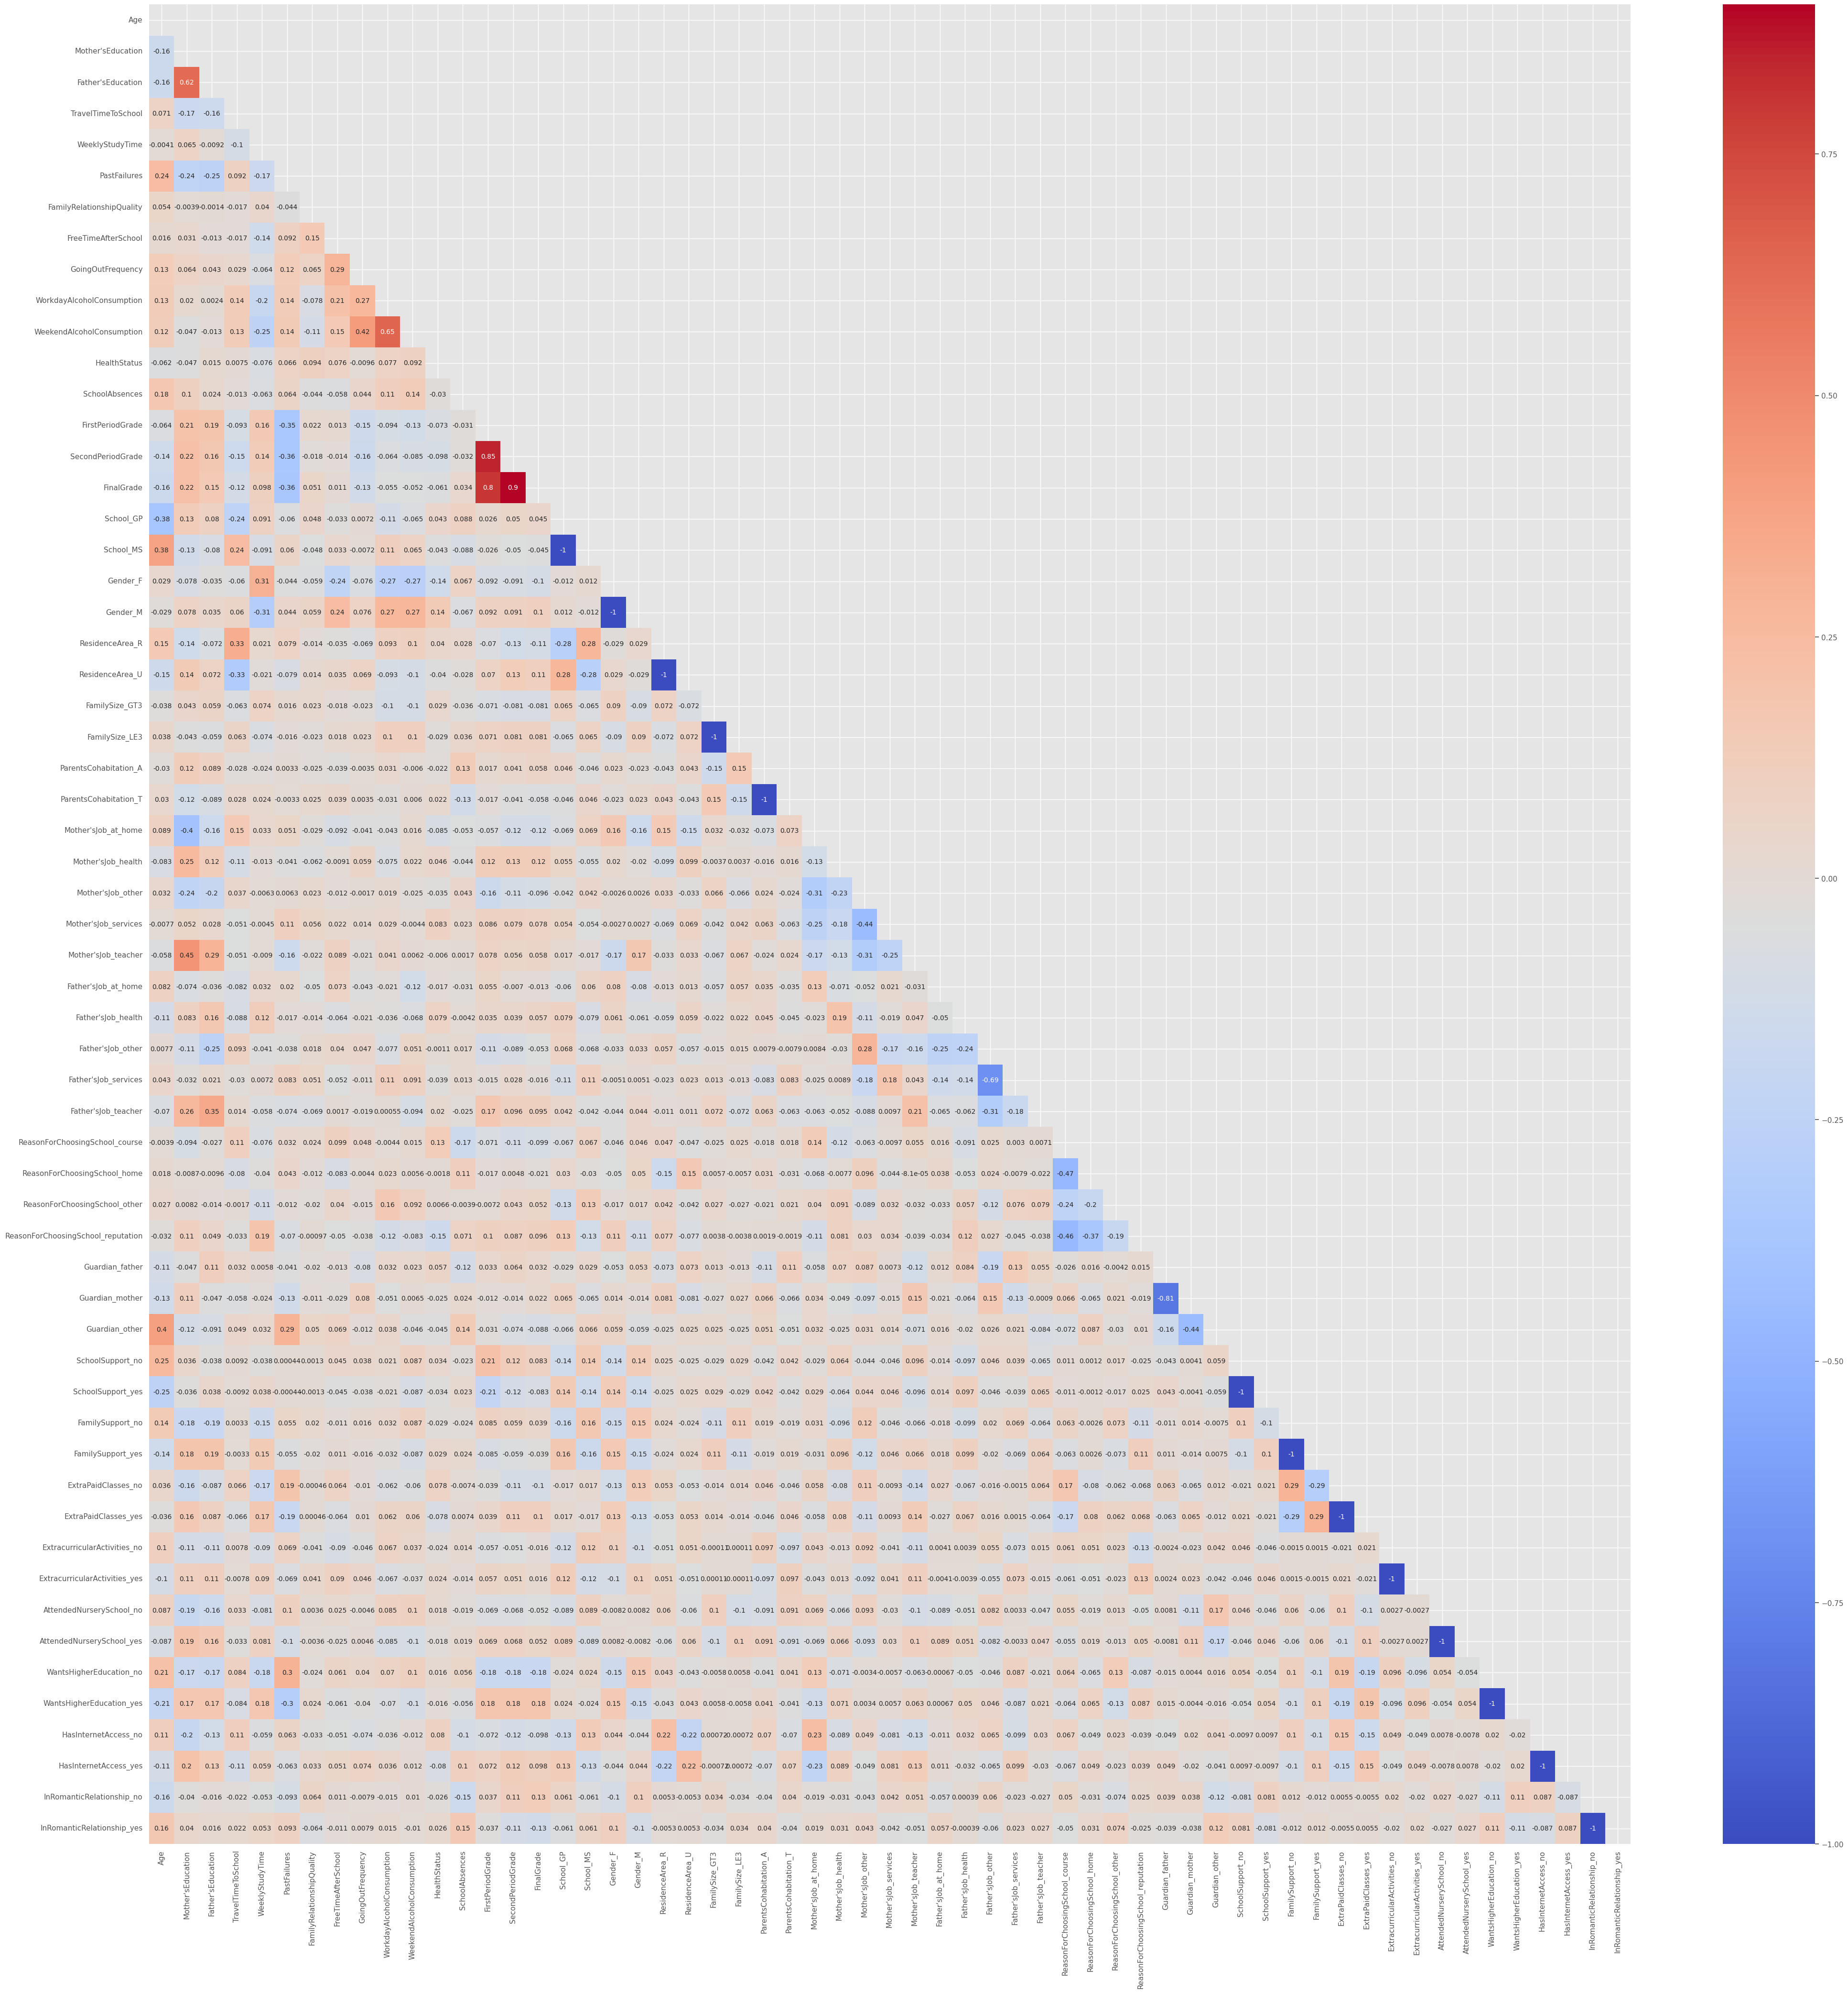

In [ ]:
# Generate a correlation matrix
corr = df_encoded.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(50, 50))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking, cmap='coolwarm')
plt.show()

## **5. Outlier Detection**

There is no formal definition for an outlier. You can think
of them as any data point that is very different to the
majority.

How you deal with outliers is dependent on the problem
you are solving, and the model you are applying. For
example, if your data contained one value that was 1000x
any other, this could badly affect a Linear Regression
model which tries to generalise a rule across all
observations. A Decision Tree would be unaffected
however, as it deals with each observation independently.
In practice, outliers are commonly isolated using the
number of standard deviations from the mean, or a rule
based upon the interquartile range.

In cases where you want to mitigate the effects of outliers,
you may look to simply remove any observations (rows)
that contain outlier values in one or more of the columns
or you may look to replace their values to reduce their
effect.

Always remember - just because a value is very high, or
very low, that does not mean it is wrong to be included.

### Criteria To Identify An Outlier


1.   Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.
2.   Data point that falls outside of 3 standard deviations, we can use a **z score** falls outside of 2 standard deviation.



### Reasons For Having Outliers


1.   Variability in the data.
2.   An experimental error



### Impacts Of Having Outliers In A Dataset



1.   It causes various problems during out statistical analysis.
2.   It may cause a significant impact on the mean and standard deviation.



### Various Ways Of Finding The Outlier


1.   Using scatter plots
2.   Box plot
3.   Using z-score
4.   Using the IQR (interquartile range)



### **Our goal is to convert data into standard normal form**

In [ ]:
df_encoded.describe()

Age  Mother'sEducation  Father'sEducation  TravelTimeToSchool  \
count  395.000000         395.000000         395.000000          395.000000   
mean    16.696203           2.749367           2.521519            1.448101   
std      1.276043           1.094735           1.088201            0.697505   
min     15.000000           0.000000           0.000000            1.000000   
25%     16.000000           2.000000           2.000000            1.000000   
50%     17.000000           3.000000           2.000000            1.000000   
75%     18.000000           4.000000           3.000000            2.000000   
max     22.000000           4.000000           4.000000            4.000000   

       WeeklyStudyTime  PastFailures  FamilyRelationshipQuality  \
count       395.000000    395.000000                 395.000000   
mean          2.035443      0.334177                   3.944304   
std           0.839240      0.743651                   0.896659   
min           1.000000      0.000000                   1.000000   
25%           1.000000      0.000000                   4.000000   
50%           2.000000      0.000000                   4.000000   
75%           2.000000      0.000000                   5.000000   
max           4.000000      3.000000                   5.000000   

       FreeTimeAfterSchool  GoingOutFrequency  WorkdayAlcoholConsumption  \
count           395.000000         395.000000                 395.000000   
mean              3.235443           3.108861                   1.481013   
std               0.998862           1.113278                   0.890741   
min               1.000000           1.000000                   1.000000   
25%               3.000000           2.000000                   1.000000   
50%               3.000000           3.000000                   1.000000   
75%               4.000000           4.000000                   2.000000   
max               5.000000           5.000000                   5.000000   

       WeekendAlcoholConsumption  HealthStatus  SchoolAbsences  \
count                 395.000000    395.000000      395.000000   
mean                    2.291139      3.554430        5.708861   
std                     1.287897      1.390303        8.003096   
min                     1.000000      1.000000        0.000000   
25%                     1.000000      3.000000        0.000000   
50%                     2.000000      4.000000        4.000000   
75%                     3.000000      5.000000        8.000000   
max                     5.000000      5.000000       75.000000   

       FirstPeriodGrade  SecondPeriodGrade  FinalGrade  
count        395.000000         395.000000  395.000000  
mean          10.908861          10.713924   10.415190  
std            3.319195           3.761505    4.581443  
min            3.000000           0.000000    0.000000  
25%            8.000000           9.000000    8.000000  
50%           11.000000          11.000000   11.000000  
75%           13.000000          13.000000   14.000000  
max           19.000000          19.000000   20.000000

In [ ]:
# prompt: find outliers using z score

import numpy as np
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(df_encoded.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# Print the indices of the rows containing outliers
print("Indices of rows with outliers:", outlier_indices)

Indices of rows with outliers: [2, 389, 134, 392, 144, 18, 146, 276, 149, 150, 280, 153, 25, 29, 157, 164, 299, 173, 307, 183, 184, 315, 61, 66, 327, 74, 78, 206, 207, 349, 350, 223, 375, 100, 228, 357, 108, 236, 247, 127]


In [ ]:
# prompt: remove the outliers lines

# Remove rows with outliers
df_no_outliers = df_encoded.drop(outlier_indices)

# Print the DataFrame without outliers
pd.DataFrame(df_no_outliers)


Age  Mother'sEducation  Father'sEducation  TravelTimeToSchool  \
0     18                  4                  4                   2   
1     17                  1                  1                   1   
3     15                  4                  2                   1   
4     16                  3                  3                   1   
5     16                  4                  3                   1   
..   ...                ...                ...                 ...   
388   18                  3                  1                   1   
390   20                  2                  2                   1   
391   17                  3                  1                   2   
393   18                  3                  2                   3   
394   19                  1                  1                   1   

     WeeklyStudyTime  PastFailures  FamilyRelationshipQuality  \
0                  2             0                          4   
1                  2             0                          5   
3                  3             0                          3   
4                  2             0                          4   
5                  2             0                          5   
..               ...           ...                        ...   
388                2             0                          4   
390                2             2                          5   
391                1             0                          2   
393                1             0                          4   
394                1             0                          3   

     FreeTimeAfterSchool  GoingOutFrequency  WorkdayAlcoholConsumption  ...  \
0                      3                  4                          1  ...   
1                      3                  3                          1  ...   
3                      2                  2                          1  ...   
4                      3                  2                          1  ...   
5                      4                  2                          1  ...   
..                   ...                ...                        ...  ...   
388                    3                  4                          1  ...   
390                    5                  4                          4  ...   
391                    4                  5                          3  ...   
393                    4                  1                          3  ...   
394                    2                  3                          3  ...   

     ExtracurricularActivities_no  ExtracurricularActivities_yes  \
0                            True                          False   
1                            True                          False   
3                           False                           True   
4                            True                          False   
5                           False                           True   
..                            ...                            ...   
388                          True                          False   
390                          True                          False   
391                          True                          False   
393                          True                          False   
394                          True                          False   

     AttendedNurserySchool_no  AttendedNurserySchool_yes  \
0                       False                       True   
1                        True                      False   
3                       False                       True   
4                       False                       True   
5                       False                       True   
..                        ...                        ...   
388                     False                       True   
390                     False                       True   
391                      True                      False   
393              

In [ ]:
# using IQR
# steps:
# 1. Sort the data in ascending order.
sorted(df_encoded)

# 2. Find Q1 and Q3
Q1, Q3 = np.percentile(df_encoded, [25, 75])

# 3. Find Interquartile range (Q3-Q1)
IQR = Q3 - Q1

# 4. Find Lower Bound q1 - (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# 5. Find Upper Bound Q3 + (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(lower_bound)
print(upper_bound)
# 6. Identify Outliers
outliers = df_encoded[(df_encoded < lower_bound) | (df_encoded > upper_bound)]

# 7. Print Outliers
# outliers
# anything outside upper and lower bound is outlier


-1.5
2.5


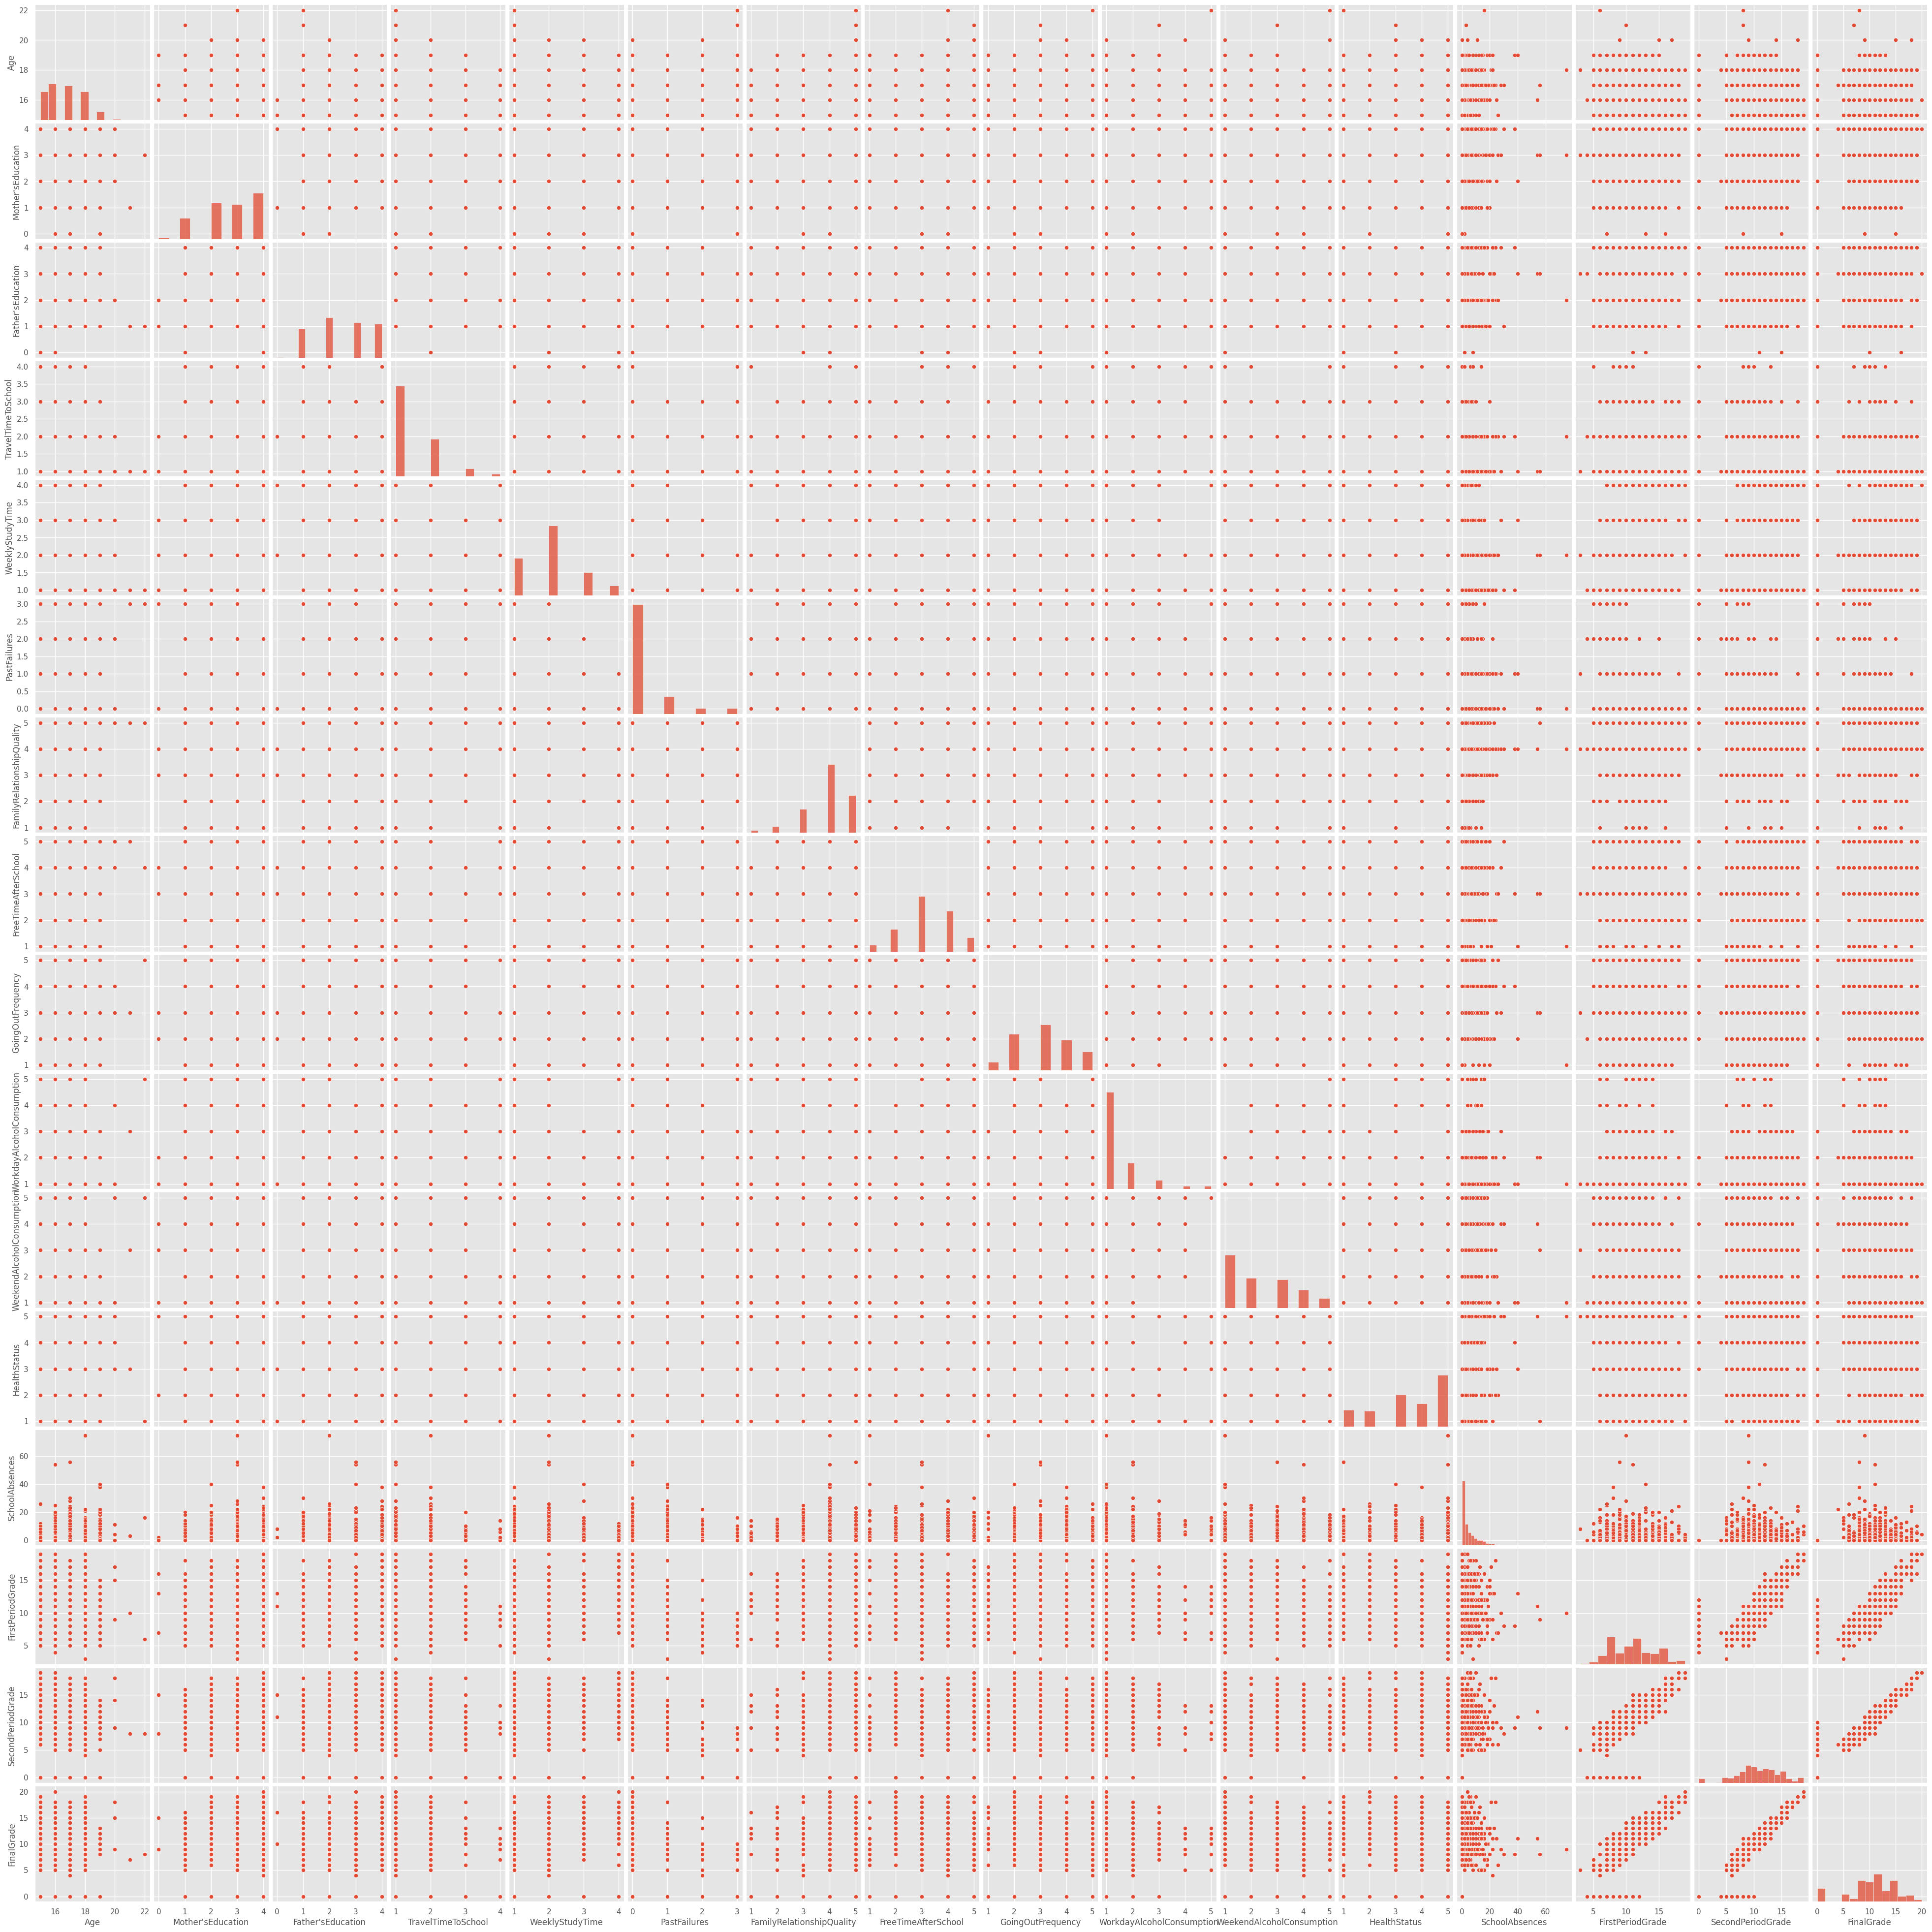

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Select numerical columns for outlier detection
numerical_cols = df_encoded.select_dtypes(include=np.number).columns

# Create a scatter plot matrix to visualize potential outliers
sns.pairplot(df_encoded[numerical_cols])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


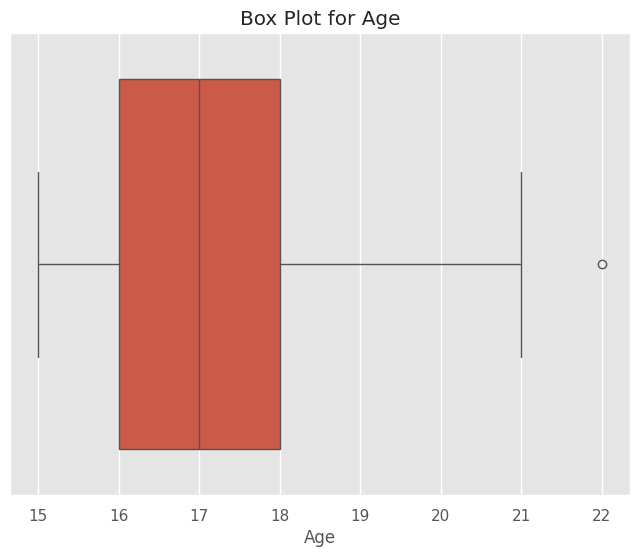

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


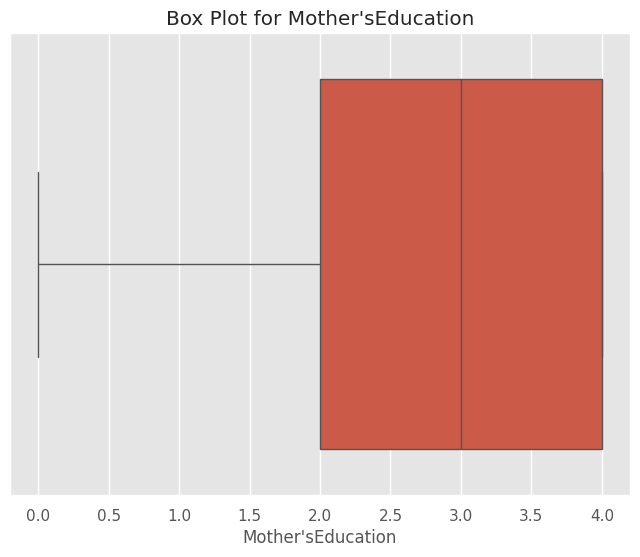

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


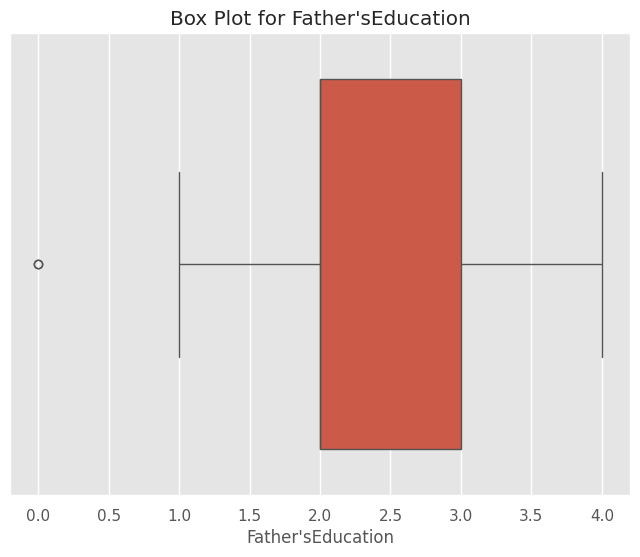

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


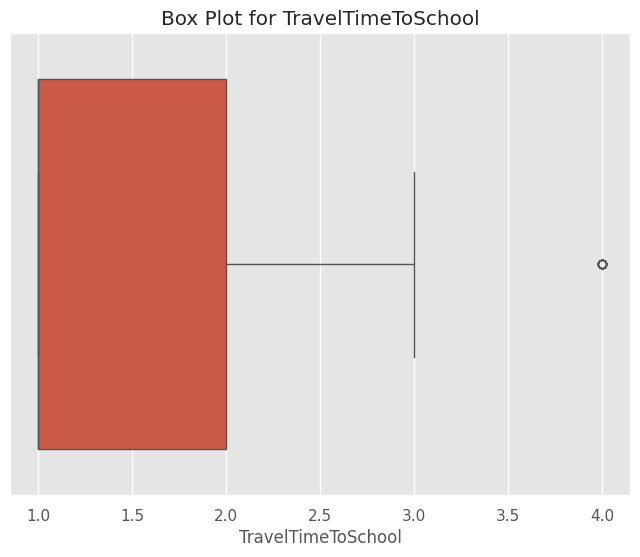

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


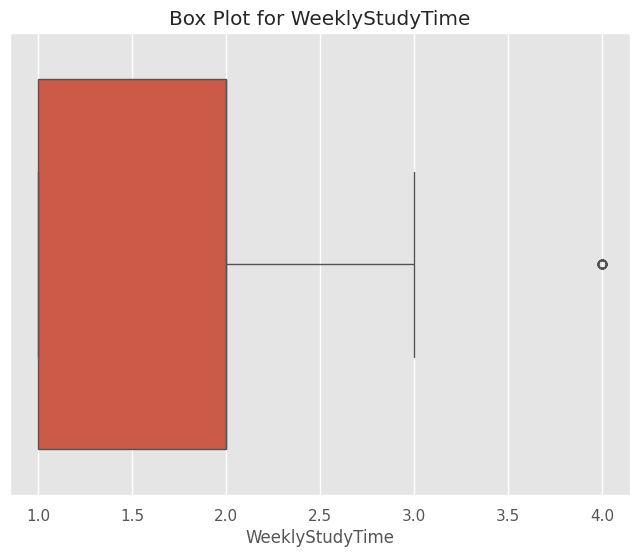

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


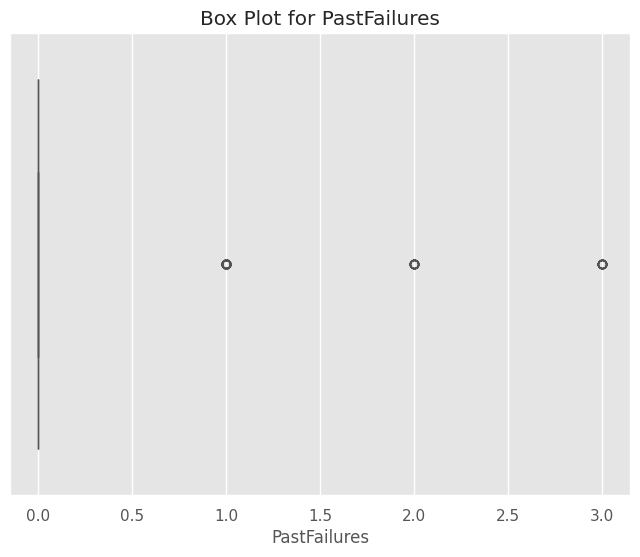

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


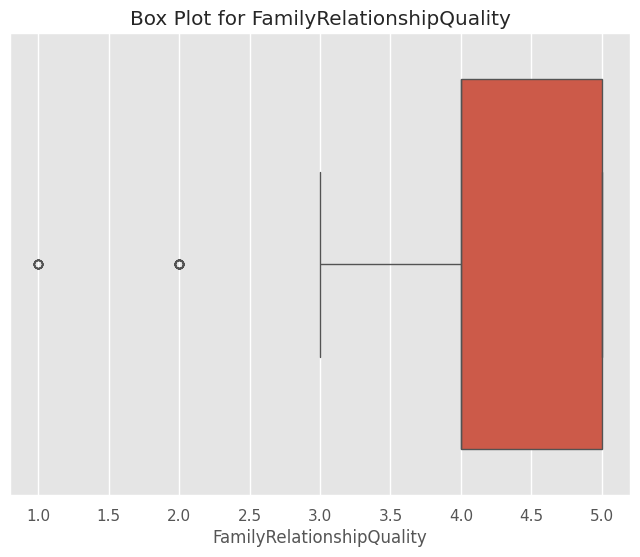

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


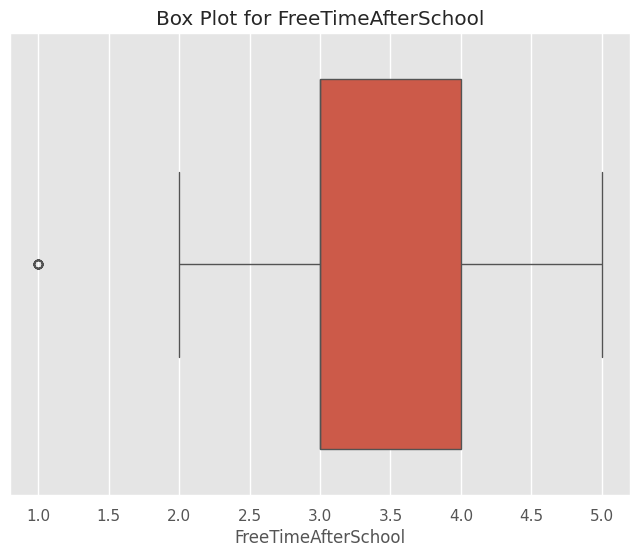

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


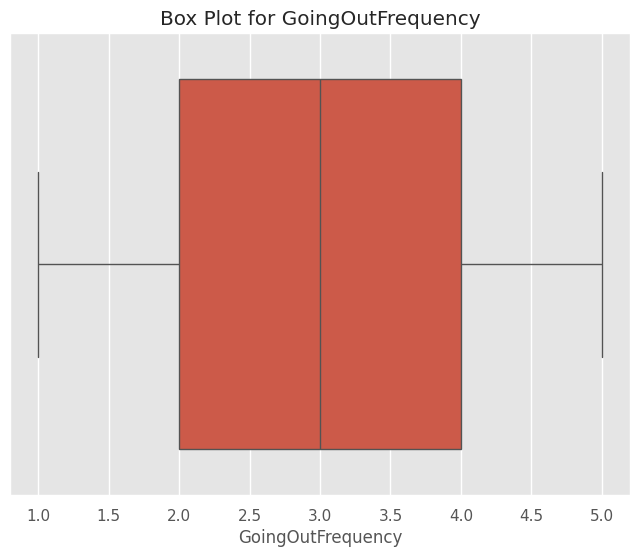

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


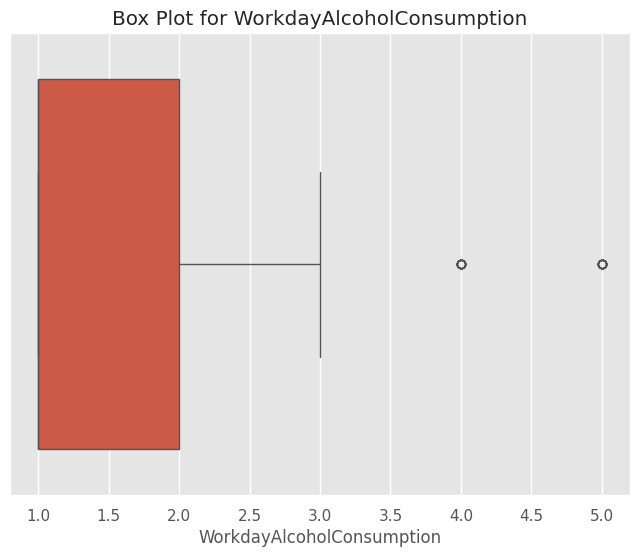

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


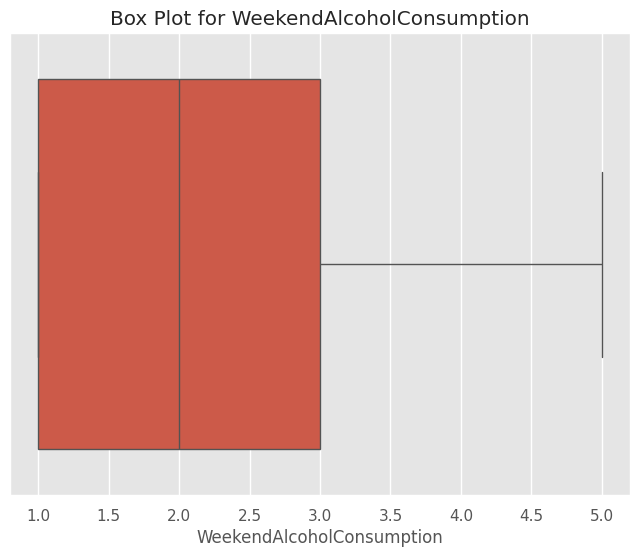

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


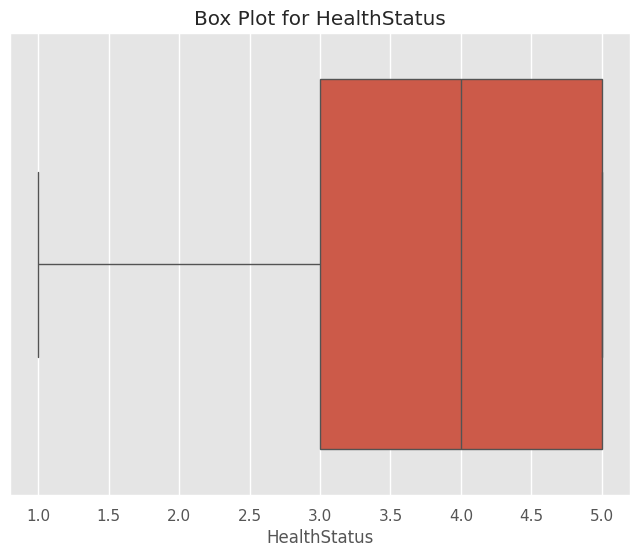

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


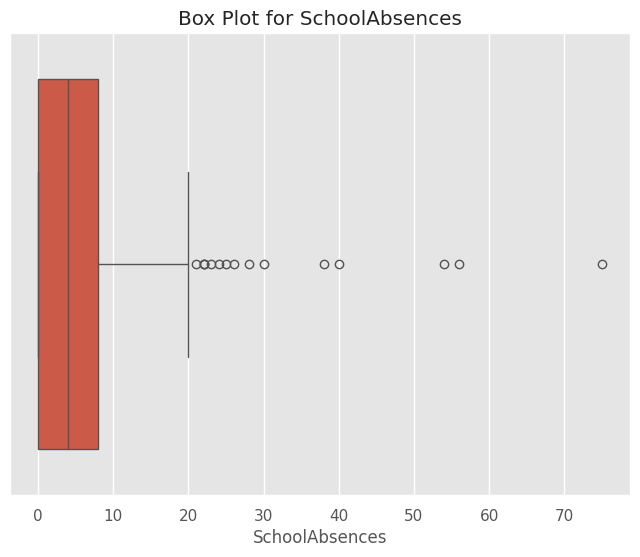

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


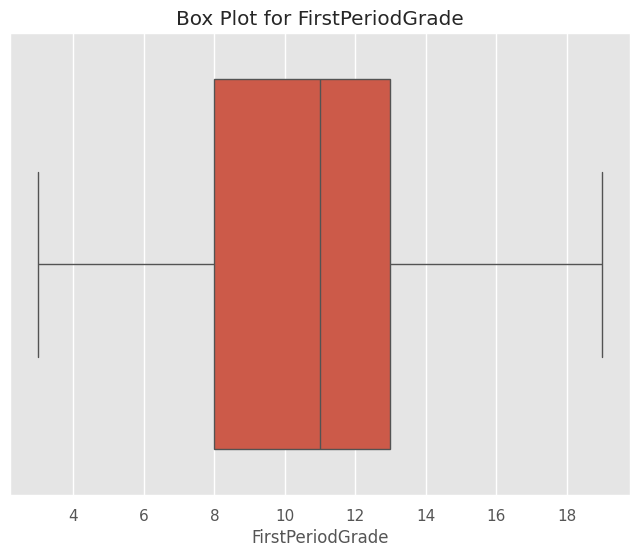

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


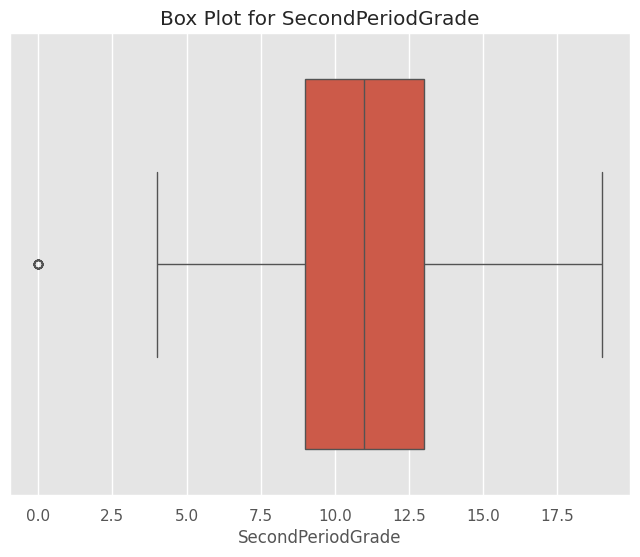

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


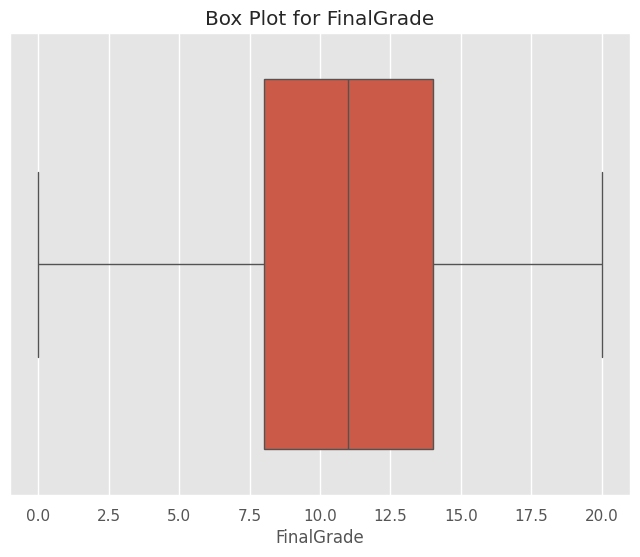

In [ ]:
# Create box plots for all numerical columns to visualize outliers
for col in df_encoded.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df_encoded[col])
  plt.title(f"Box Plot for {col}")
  plt.show()

## **6. Feature Scaling**

Feature Scaling is where you force all the values from a
column in your data to exist on the same scale. In certain
scenarios it will help the model assess the relationships
between variables more fairly, and more accurately.

The two most common scaling techniques are:

**Standardisation:** rescales all values to have a mean of 0
and standard deviation of 1. In other words, the majority
of your values end up between -4 and +4

**Normalisation:** rescales data so that it exists in a range
between 0 and 1

**Feature Scaling is essential** for distance-based models
such as k-means or k-nearest-neighbours.

**Feature Scaling is recommended** for any algorithms that
utilise Gradient Descent such as Linear Regression,
Logistic Regression, and Neural Networks.

**Feature Scaling is not necessary** for tree-based
algorithms such as Decision Trees & Random Forests.

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Create a PowerTransformer object
power_scaler = PowerTransformer()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = power_scaler.fit_transform(df_encoded[numerical_cols])

# Print the scaled DataFrame
df_encoded.head()



Age  Mother'sEducation  Father'sEducation  TravelTimeToSchool  \
0  1.041662           1.177841           1.334339            1.277300   
1  0.338006          -1.542924          -1.425954           -0.729771   
2 -1.460045          -1.542924          -1.425954           -0.729771   
3 -1.460045           1.177841          -0.454069           -0.729771   
4 -0.486022           0.185307           0.460370           -0.729771   

   WeeklyStudyTime  PastFailures  FamilyRelationshipQuality  \
0         0.105119     -0.515691                  -0.076922   
1         0.105119     -0.515691                   1.368839   
2         0.105119      1.992221                  -0.076922   
3         1.144228     -0.515691                  -1.144500   
4         0.105119     -0.515691                  -0.076922   

   FreeTimeAfterSchool  GoingOutFrequency  WorkdayAlcoholConsumption  ...  \
0            -0.260086           0.813128                  -0.654266  ...   
1            -0.260086          -0.055870                  -0.654266  ...   
2            -0.260086          -0.993689                   1.400624  ...   
3            -1.233142          -0.993689                  -0.654266  ...   
4            -0.260086          -0.993689                  -0.654266  ...   

   ExtracurricularActivities_no  ExtracurricularActivities_yes  \
0                          True                          False   
1                          True                          False   
2                          True                          False   
3                         False                           True   
4                          True                          False   

   AttendedNurserySchool_no  AttendedNurserySchool_yes  \
0                     False                       True   
1                      True                      False   
2                     False                       True   
3                     False                       True   
4                     False                       True   

   WantsHigherEducation_no  WantsHigherEducation_yes  HasInternetAccess_no  \
0                    False                      True                  True   
1                    False                      True                 False   
2                    False                      True                 False   
3                    False                      True                 False   
4                    False                      True                  True   

   HasInternetAccess_yes  InRomanticRelationship_no  \
0                  False                       True   
1                   True                       True   
2                   True                       True   
3                   True                      False   
4                  False                       True   

   InRomanticRelationship_yes  
0                       False  
1                       False  
2                       False  
3                        True  
4                       False  

[5 rows x 59 columns]

In [ ]:
df_encoded.describe()

Age  Mother'sEducation  Father'sEducation  TravelTimeToSchool  \
count  3.950000e+02       3.950000e+02       3.950000e+02        3.950000e+02   
mean   1.493759e-13      -4.317222e-16       4.047395e-16        3.768575e-15   
std    1.001268e+00       1.001268e+00       1.001268e+00        1.001268e+00   
min   -1.460045e+00      -2.229203e+00      -2.493694e+00       -7.297709e-01   
25%   -4.860221e-01      -7.274020e-01      -4.540691e-01       -7.297709e-01   
50%    3.380064e-01       1.853067e-01      -4.540691e-01       -7.297709e-01   
75%    1.041662e+00       1.177841e+00       4.603705e-01        1.277300e+00   
max    3.035801e+00       1.177841e+00       1.334339e+00        1.710525e+00   

       WeeklyStudyTime  PastFailures  FamilyRelationshipQuality  \
count     3.950000e+02  3.950000e+02               3.950000e+02   
mean     -2.968090e-16 -5.846238e-17              -3.074896e-16   
std       1.001268e+00  1.001268e+00               1.001268e+00   
min      -1.403558e+00 -5.156909e-01              -2.315095e+00   
25%      -1.403558e+00 -5.156909e-01              -7.692217e-02   
50%       1.051192e-01 -5.156909e-01              -7.692217e-02   
75%       1.051192e-01 -5.156909e-01               1.368839e+00   
max       1.932786e+00  1.992221e+00               1.368839e+00   

       FreeTimeAfterSchool  GoingOutFrequency  WorkdayAlcoholConsumption  \
count         3.950000e+02       3.950000e+02               3.950000e+02   
mean          4.924331e-16       3.597685e-17               8.094791e-17   
std           1.001268e+00       1.001268e+00               1.001268e+00   
min          -2.144650e+00      -2.032874e+00              -6.542658e-01   
25%          -2.600860e-01      -9.936895e-01              -6.542658e-01   
50%          -2.600860e-01      -5.587050e-02              -6.542658e-01   
75%           7.614578e-01       8.131283e-01               1.400624e+00   
max           1.823382e+00       1.630948e+00               1.773702e+00   

       WeekendAlcoholConsumption  HealthStatus  SchoolAbsences  \
count               3.950000e+02  3.950000e+02    3.950000e+02   
mean                4.317222e-16  1.618958e-16   -1.888784e-16   
std                 1.001268e+00  1.001268e+00    1.001268e+00   
min                -1.139257e+00 -1.677973e+00   -1.313038e+00   
25%                -1.139257e+00 -5.046391e-01   -1.313038e+00   
50%                 3.144710e-02  2.478391e-01    2.449985e-01   
75%                 7.499823e-01  1.097410e+00    7.914016e-01   
max                 1.627070e+00  1.097410e+00    2.678301e+00   

       FirstPeriodGrade  SecondPeriodGrade    FinalGrade  
count      3.950000e+02       3.950000e+02  3.950000e+02  
mean       2.203582e-16      -1.259190e-16 -1.551502e-16  
std        1.001268e+00       1.001268e+00  1.001268e+00  
min       -2.926367e+00      -2.499255e+00 -2.070125e+00  
25%       -8.597833e-01      -5.089793e-01 -6.176837e-01  
50%        9.810058e-02       3.235630e-02  6.778339e-02  
75%        6.706593e-01       5.971771e-01  8.025941e-01  
max        2.176586e+00       2.409558e+00  2.392616e+00

#### **Before Scaling**

In [ ]:
# showing all the features of the dataset
df.hist(figsize=(20,20), bins =30)
plt.show()

#### **After Scaling**

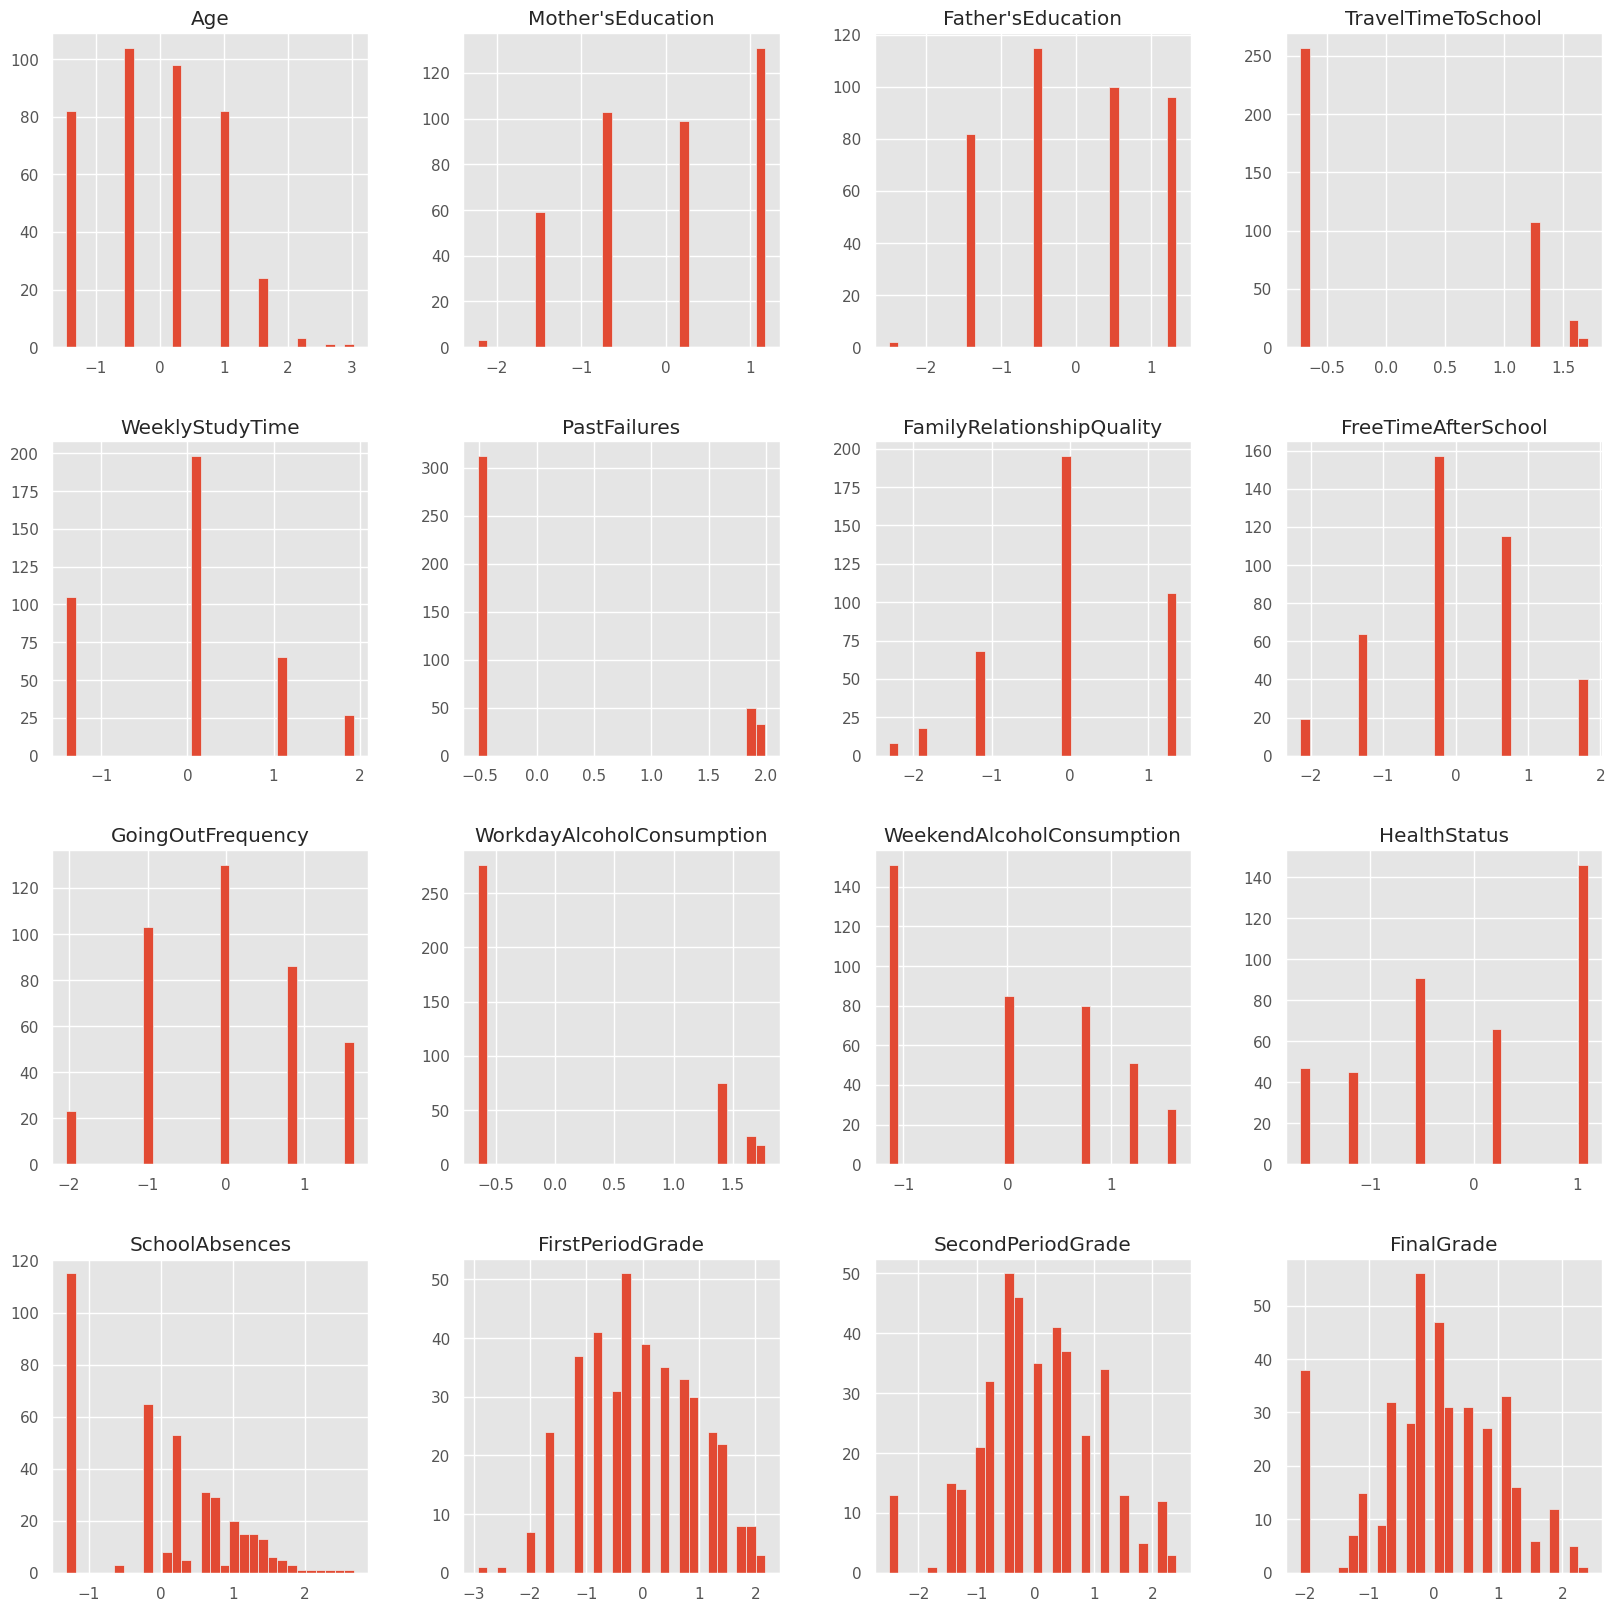

In [ ]:
# showing all the features of the dataset
df_encoded.hist(figsize=(20,20), bins =30)
plt.show()

## 7**. Feature Engineering And Feature Selection**
**Feature Engineering** is the process of using further
knowledge to supplement or transform the original
feature set.

The key to good Feature Engineering is to create or refine
features that the algorithm or model can understand
better or that it will find more useful than the raw features
for solving the particular problem at hand.

**Feature Selection** is where you only keep a subset of the
most informative variables. This can be done using
human intuition, or dynamically based upon statistical
analysis.

Columns with low variation:
['TravelTimeToSchool', 'WeeklyStudyTime', 'PastFailures', 'School_GP', 'School_MS', 'Gender_F', 'Gender_M', 'ResidenceArea_R', 'ResidenceArea_U', 'FamilySize_GT3', 'FamilySize_LE3', 'ParentsCohabitation_A', 'ParentsCohabitation_T', "Mother'sJob_at_home", "Mother'sJob_health", "Mother'sJob_other", "Mother'sJob_services", "Mother'sJob_teacher", "Father'sJob_at_home", "Father'sJob_health", "Father'sJob_other", "Father'sJob_services", "Father'sJob_teacher", 'ReasonForChoosingSchool_course', 'ReasonForChoosingSchool_home', 'ReasonForChoosingSchool_other', 'ReasonForChoosingSchool_reputation', 'Guardian_father', 'Guardian_mother', 'Guardian_other', 'SchoolSupport_no', 'SchoolSupport_yes', 'FamilySupport_no', 'FamilySupport_yes', 'ExtraPaidClasses_no', 'ExtraPaidClasses_yes', 'ExtracurricularActivities_no', 'ExtracurricularActivities_yes', 'AttendedNurserySchool_no', 'AttendedNurserySchool_yes', 'WantsHigherEducation_no', 'WantsHigherEducation_yes', 'HasInternetAcc

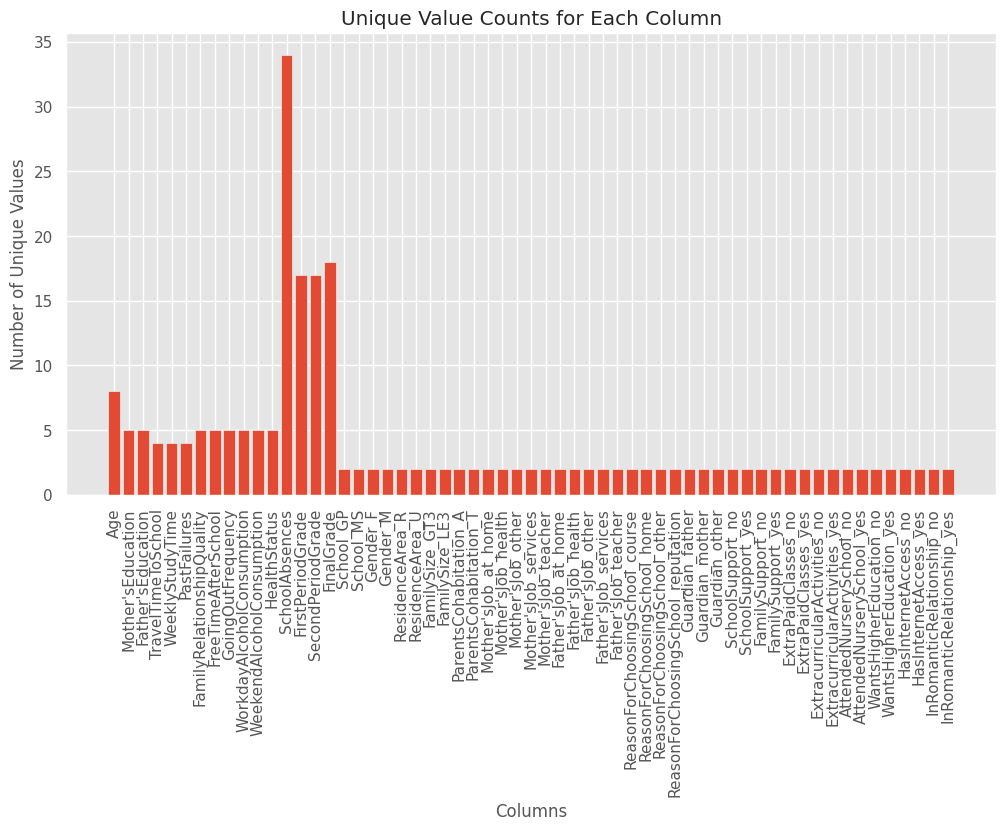

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df_encoded.nunique()

# Identify columns with low variation (e.g., fewer than 5 unique values)
low_variation_columns = unique_counts[unique_counts < 5].index.tolist()

print("Columns with low variation:")
print(low_variation_columns)

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()

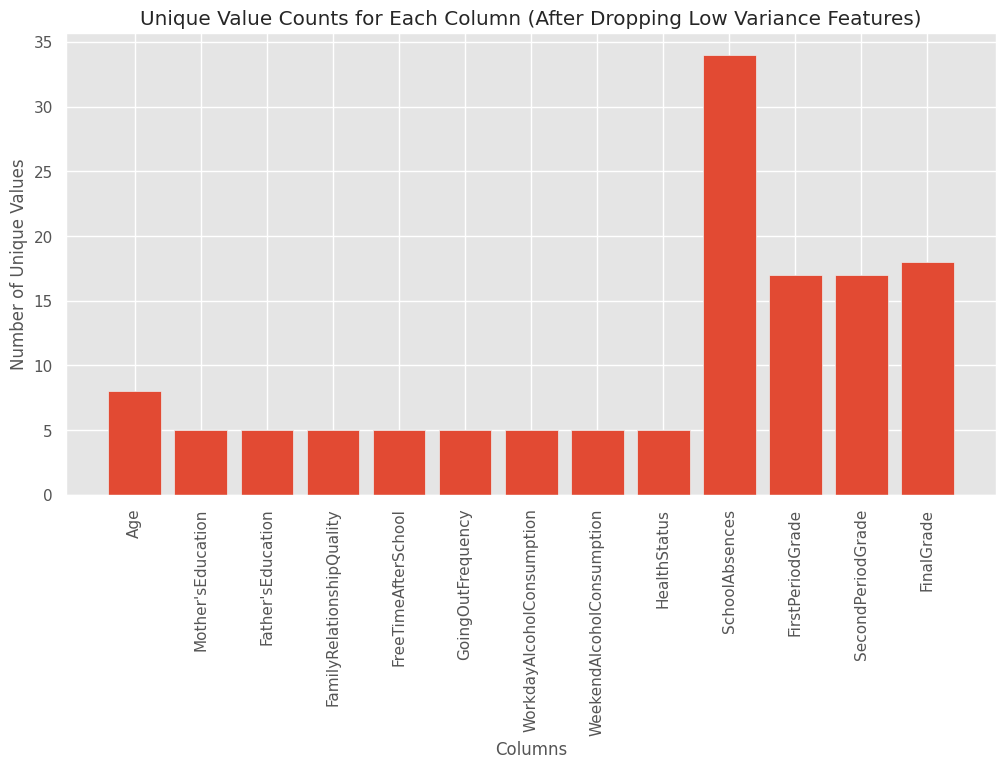

In [ ]:

import matplotlib.pyplot as plt
# Identify columns with low variation (e.g., fewer than 5 unique values)
low_variation_columns = unique_counts[unique_counts < 5].index.tolist()

# Drop columns with low variation
df_encoded = df_encoded.drop(columns=low_variation_columns)

# Recalculate the number of unique values for each column
unique_counts = df_encoded.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")
plt.show()


In [ ]:
# # prompt: draw graph of each feature with firstPeriodGrade, secondPeriodGrade and FinalGrade to show their dependency on the independent variables

# import matplotlib.pyplot as plt
# # List of target variables
# target_variables = ['FirstPeriodGrade', 'SecondPeriodGrade', 'FinalGrade']

# # Loop through each feature in the DataFrame
# for feature in df_encoded.columns:
#   if feature not in target_variables:  # Exclude target variables themselves
#     # Create a figure and subplots for each target variable
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))
#     fig.suptitle(f"Relationship between {feature} and Target Variables")

#     # Iterate through target variables and create individual plots
#     for i, target in enumerate(target_variables):
#       axes[i].scatter(df_encoded[feature], df_encoded[target])
#       axes[i].set_xlabel(feature)
#       axes[i].set_ylabel(target)
#       axes[i].set_title(f"{feature} vs. {target}")

#     plt.tight_layout()
#     plt.show()


In [ ]:
# # Create a new column 'AverageGrade' by averaging 'FirstPeriodGrade', 'SecondPeriodGrade', and 'FinalGrade'
# df_encoded['AverageGrade'] = (df_encoded['FirstPeriodGrade'] + df_encoded['SecondPeriodGrade'] + df_encoded['FinalGrade']) / 3

# # Drop the original grade columns if you no longer need them
# df_encoded = df_encoded.drop(['FirstPeriodGrade', 'SecondPeriodGrade', 'FinalGrade'], axis=1)

# # Display the updated DataFrame with the new 'AverageGrade' column
# df_encoded.head()


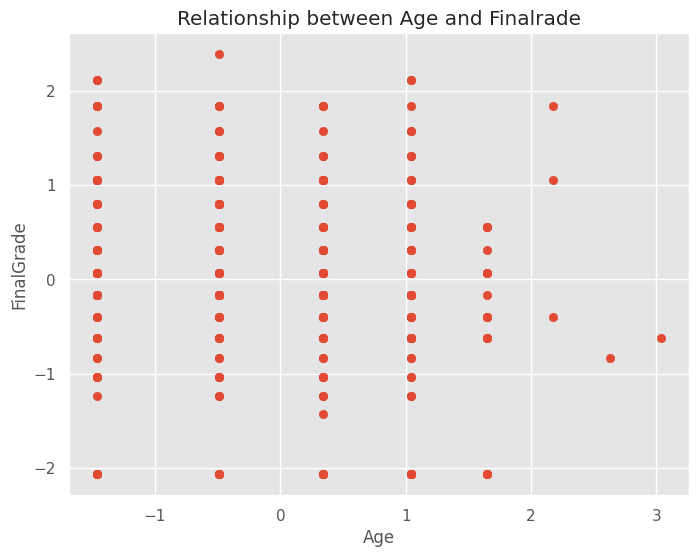

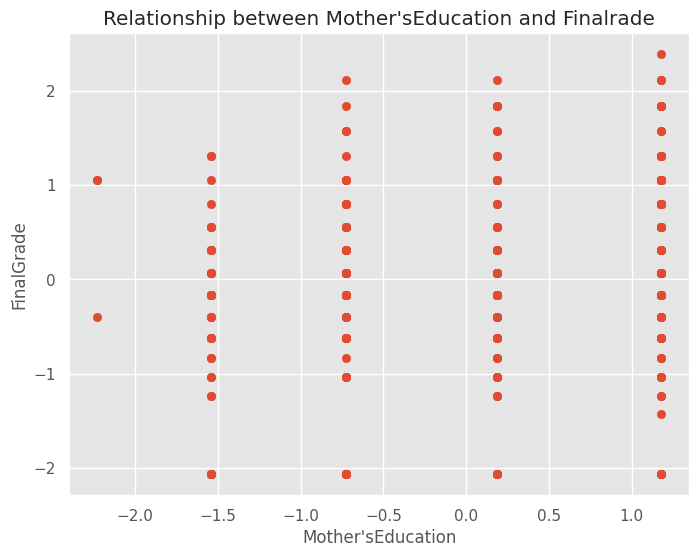

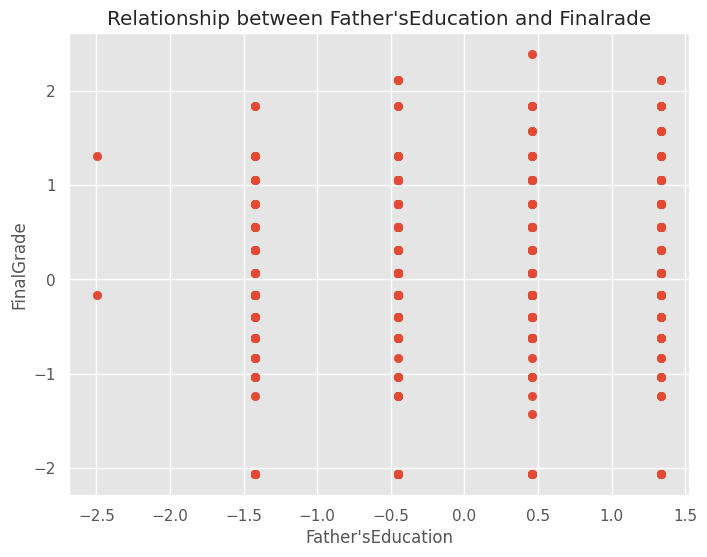

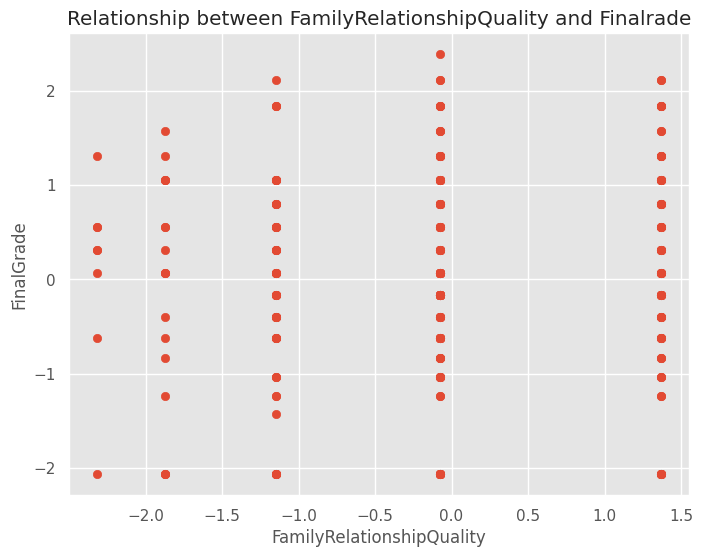

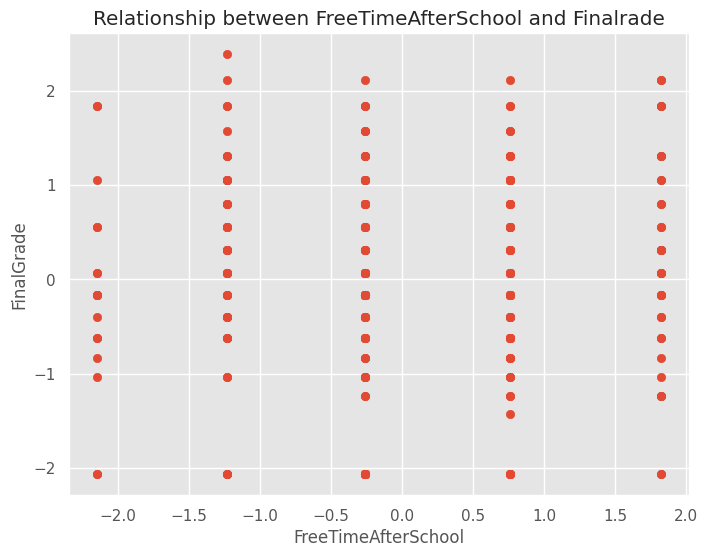

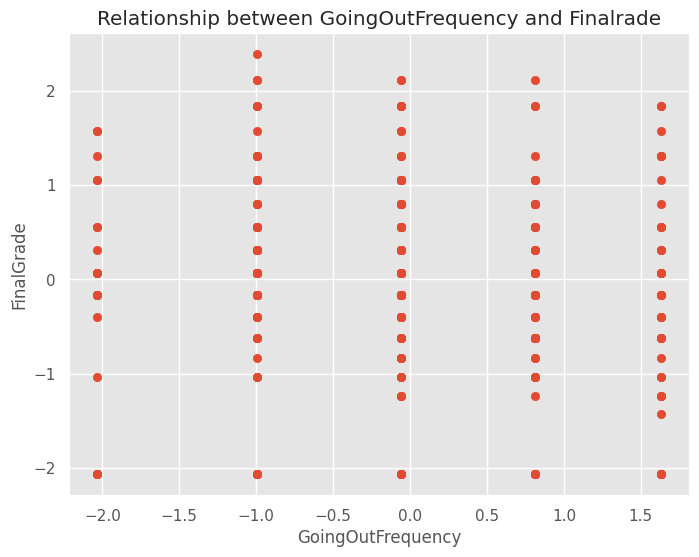

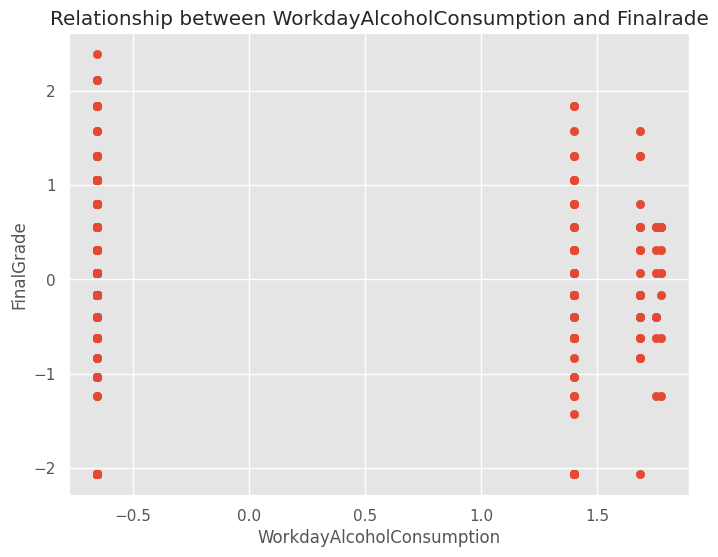

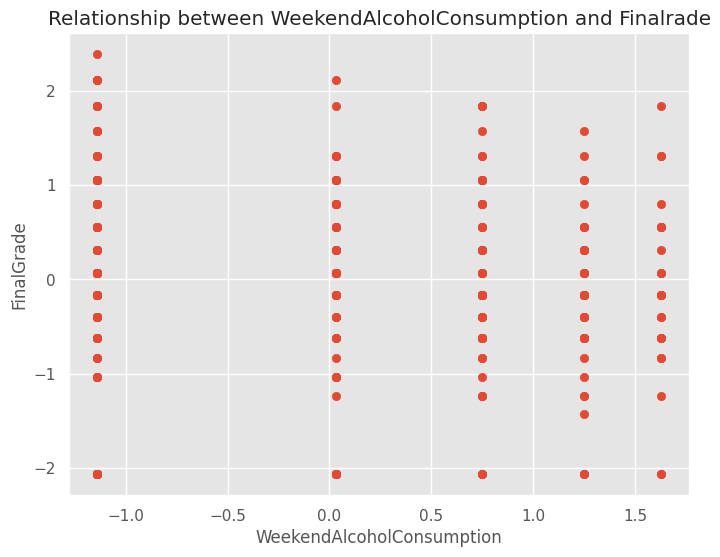

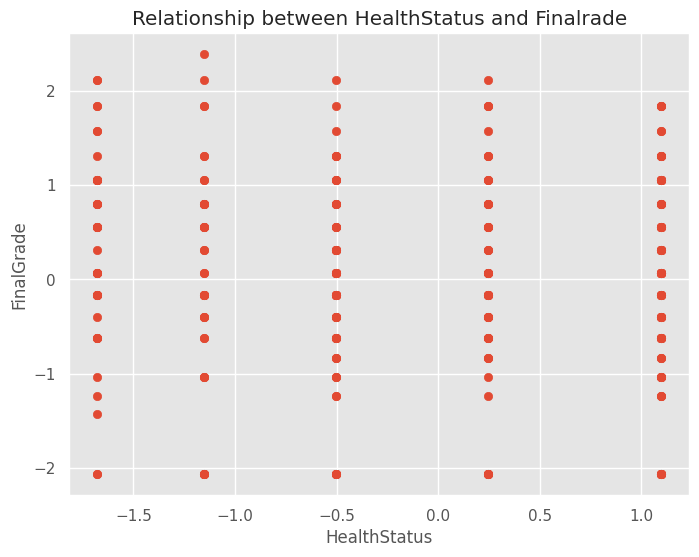

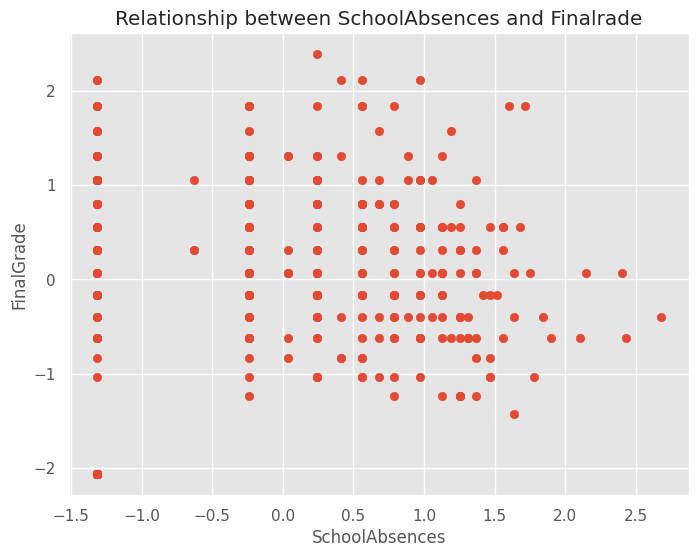

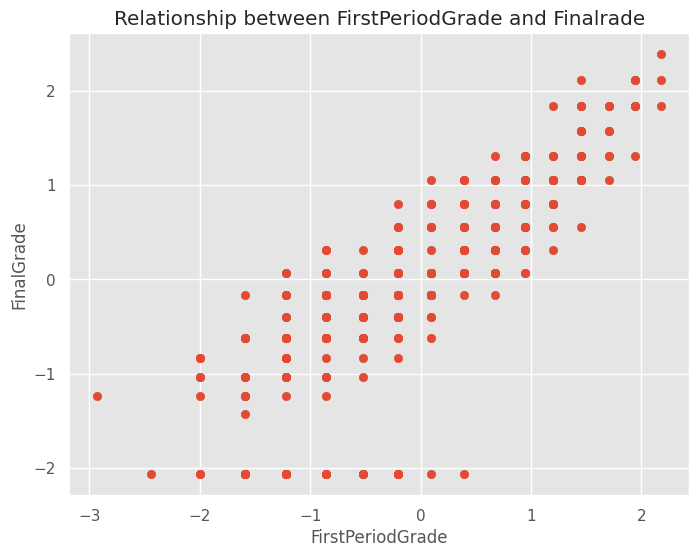

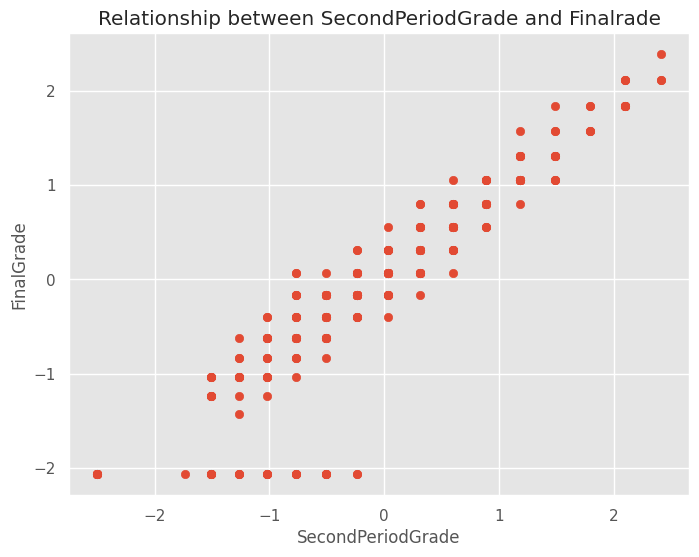

In [ ]:

import matplotlib.pyplot as plt
# Loop through each feature in the DataFrame
for feature in df_encoded.columns:
  if feature != 'FinalGrade':  # Exclude '' itself
    # Create a scatter plot to visualize the relationship between the feature and 'AverageGrade'
    plt.figure(figsize=(8, 6))
    plt.scatter(df_encoded[feature], df_encoded['FinalGrade'])
    plt.xlabel(feature)
    plt.ylabel('FinalGrade')
    plt.title(f"Relationship between {feature} and Finalrade")
    plt.show()


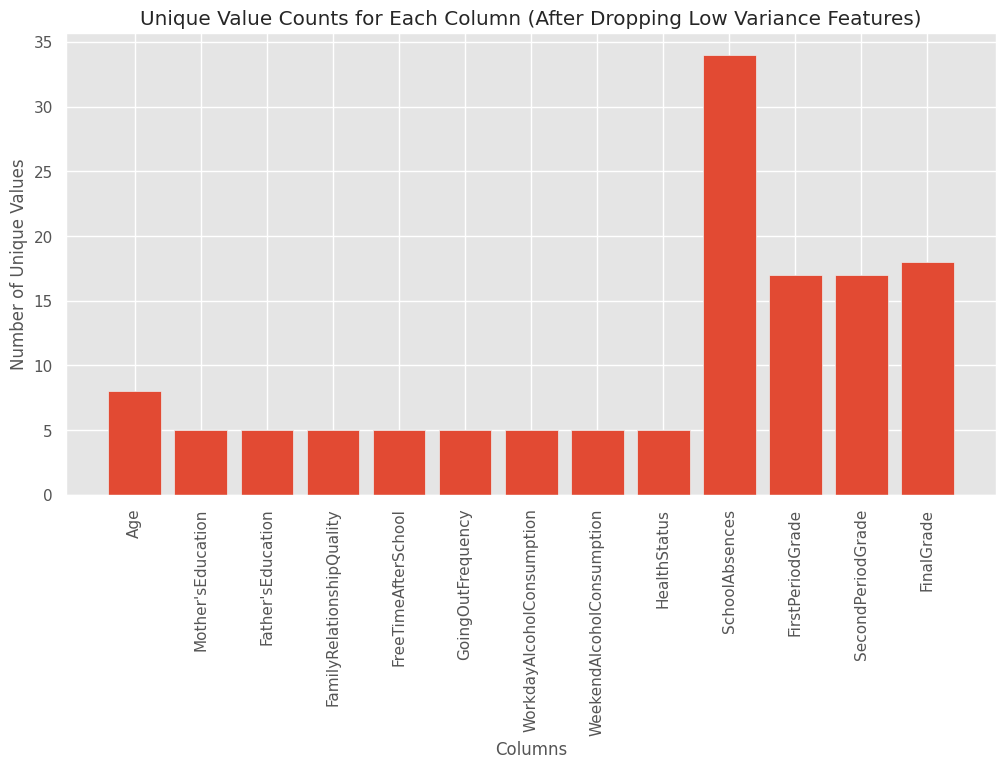

In [ ]:

import matplotlib.pyplot as plt
# Identify columns with low variation (e.g., fewer than 5 unique values)
low_variation_columns = unique_counts[unique_counts < 5].index.tolist()

# Drop columns with low variation
df_encoded = df_encoded.drop(columns=low_variation_columns)

# Recalculate the number of unique values for each column
unique_counts = df_encoded.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")
plt.show()

# Step 7: Linear Regression with 12 Variables

## 8. Validation Split

The Validation Split is where you partition your data into a
training set, and a validation set (and sometimes a
test set as well).

You train the model with the training set only. The
validation and/or test sets, are held-back from training and
are used to assess model performance. They provide a
true understanding of how accurate predictions are on
new or unseen data.

An approach called k-fold cross validation can provide
you with an even more robust understanding of model
performance.

Here, the entire dataset is again partitioned into training &
validation sets, and the model is trained and assessed like
before. However, this process is done multiple times with
the training and test sets being rotated to encompass
different sets of observations within the data. You do this
k times - with your final predictive accuracy assessment
being based upon the average of each of the iterations.

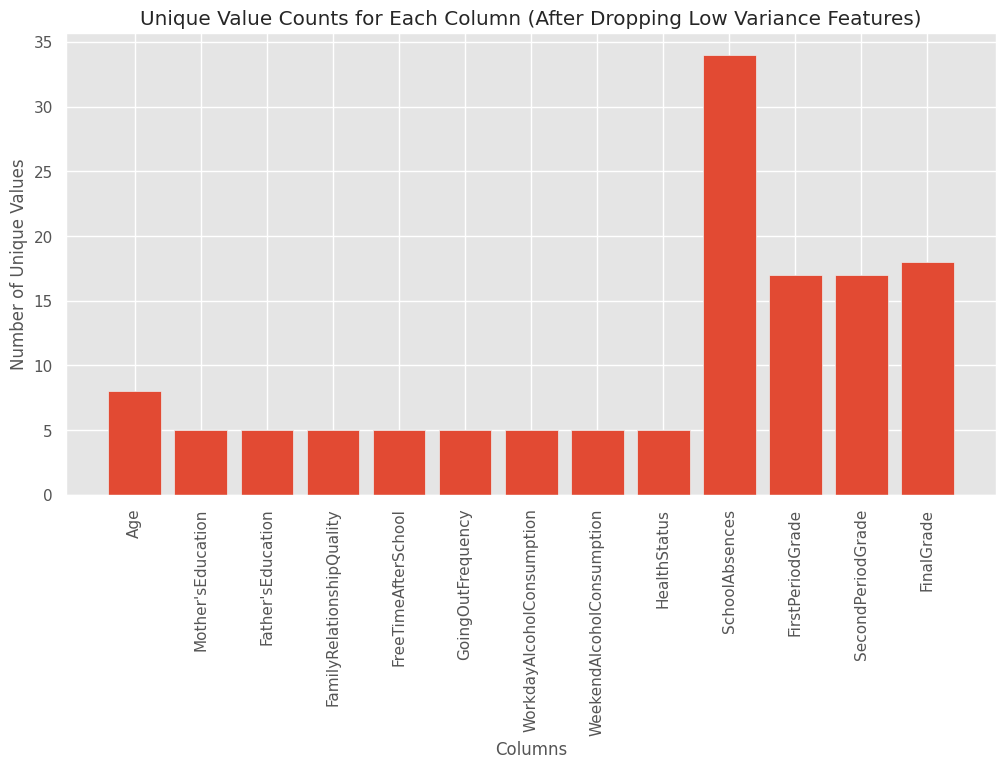

In [ ]:

import matplotlib.pyplot as plt
# Identify columns with low variation (e.g., fewer than 5 unique values)
low_variation_columns = unique_counts[unique_counts < 5].index.tolist()

# Drop columns with low variation
df_encoded = df_encoded.drop(columns=low_variation_columns)

# Recalculate the number of unique values for each column
unique_counts = df_encoded.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")
plt.show()

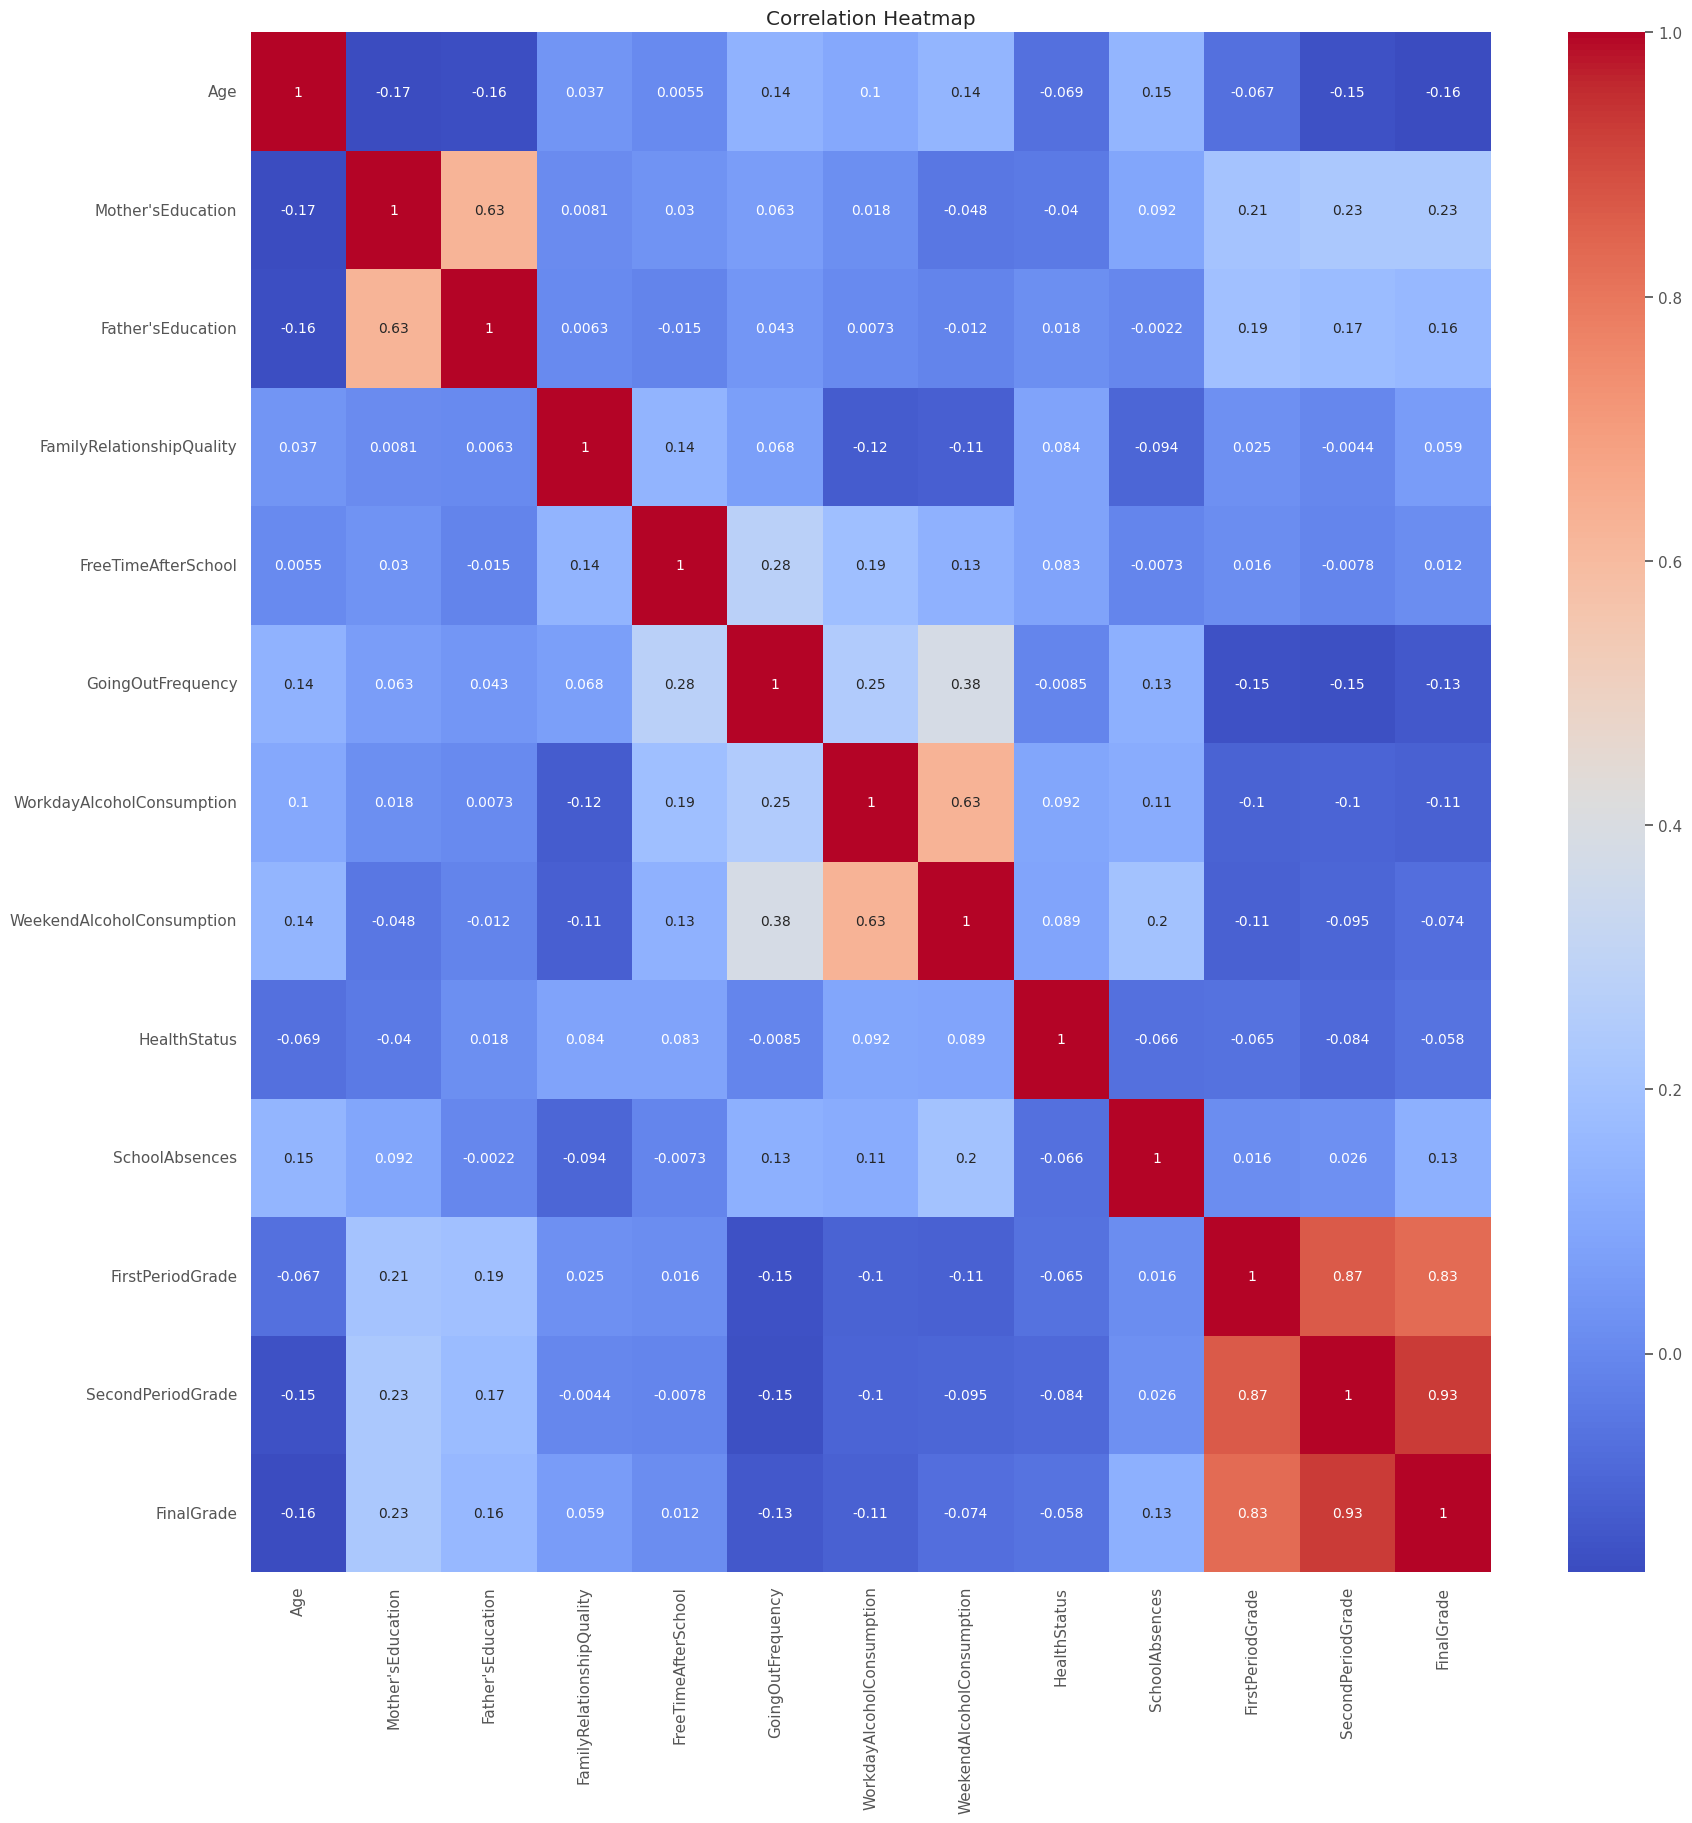

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        395 non-null    float64
 1   Mother'sEducation          395 non-null    float64
 2   Father'sEducation          395 non-null    float64
 3   FamilyRelationshipQuality  395 non-null    float64
 4   FreeTimeAfterSchool        395 non-null    float64
 5   GoingOutFrequency          395 non-null    float64
 6   WorkdayAlcoholConsumption  395 non-null    float64
 7   WeekendAlcoholConsumption  395 non-null    float64
 8   HealthStatus               395 non-null    float64
 9   SchoolAbsences             395 non-null    float64
 10  FirstPeriodGrade           395 non-null    float64
 11  SecondPeriodGrade          395 non-null    float64
 12  FinalGrade                 395 non-null    float64
dtypes: float64(13)
memory usage: 40.2 KB


In [ ]:
df_encoded.describe()

Age  Mother'sEducation  Father'sEducation  \
count  3.950000e+02       3.950000e+02       3.950000e+02   
mean   1.493759e-13      -4.317222e-16       4.047395e-16   
std    1.001268e+00       1.001268e+00       1.001268e+00   
min   -1.460045e+00      -2.229203e+00      -2.493694e+00   
25%   -4.860221e-01      -7.274020e-01      -4.540691e-01   
50%    3.380064e-01       1.853067e-01      -4.540691e-01   
75%    1.041662e+00       1.177841e+00       4.603705e-01   
max    3.035801e+00       1.177841e+00       1.334339e+00   

       FamilyRelationshipQuality  FreeTimeAfterSchool  GoingOutFrequency  \
count               3.950000e+02         3.950000e+02       3.950000e+02   
mean               -3.074896e-16         4.924331e-16       3.597685e-17   
std                 1.001268e+00         1.001268e+00       1.001268e+00   
min                -2.315095e+00        -2.144650e+00      -2.032874e+00   
25%                -7.692217e-02        -2.600860e-01      -9.936895e-01   
50%                -7.692217e-02        -2.600860e-01      -5.587050e-02   
75%                 1.368839e+00         7.614578e-01       8.131283e-01   
max                 1.368839e+00         1.823382e+00       1.630948e+00   

       WorkdayAlcoholConsumption  WeekendAlcoholConsumption  HealthStatus  \
count               3.950000e+02               3.950000e+02  3.950000e+02   
mean                8.094791e-17               4.317222e-16  1.618958e-16   
std                 1.001268e+00               1.001268e+00  1.001268e+00   
min                -6.542658e-01              -1.139257e+00 -1.677973e+00   
25%                -6.542658e-01              -1.139257e+00 -5.046391e-01   
50%                -6.542658e-01               3.144710e-02  2.478391e-01   
75%                 1.400624e+00               7.499823e-01  1.097410e+00   
max                 1.773702e+00               1.627070e+00  1.097410e+00   

       SchoolAbsences  FirstPeriodGrade  SecondPeriodGrade    FinalGrade  
count    3.950000e+02      3.950000e+02       3.950000e+02  3.950000e+02  
mean    -1.888784e-16      2.203582e-16      -1.259190e-16 -1.551502e-16  
std      1.001268e+00      1.001268e+00       1.001268e+00  1.001268e+00  
min     -1.313038e+00     -2.926367e+00      -2.499255e+00 -2.070125e+00  
25%     -1.313038e+00     -8.597833e-01      -5.089793e-01 -6.176837e-01  
50%      2.449985e-01      9.810058e-02       3.235630e-02  6.778339e-02  
75%      7.914016e-01      6.706593e-01       5.971771e-01  8.025941e-01  
max      2.678301e+00      2.176586e+00       2.409558e+00  2.392616e+00

In [ ]:
df_encoded.head()

Age  Mother'sEducation  Father'sEducation  FamilyRelationshipQuality  \
0  1.041662           1.177841           1.334339                  -0.076922   
1  0.338006          -1.542924          -1.425954                   1.368839   
2 -1.460045          -1.542924          -1.425954                  -0.076922   
3 -1.460045           1.177841          -0.454069                  -1.144500   
4 -0.486022           0.185307           0.460370                  -0.076922   

   FreeTimeAfterSchool  GoingOutFrequency  WorkdayAlcoholConsumption  \
0            -0.260086           0.813128                  -0.654266   
1            -0.260086          -0.055870                  -0.654266   
2            -0.260086          -0.993689                   1.400624   
3            -1.233142          -0.993689                  -0.654266   
4            -0.260086          -0.993689                  -0.654266   

   WeekendAlcoholConsumption  HealthStatus  SchoolAbsences  FirstPeriodGrade  \
0                  -1.139257     -0.504639        0.559227         -1.996956   
1                  -1.139257     -0.504639        0.244999         -1.996956   
2                   0.749982     -0.504639        0.975255         -1.214078   
3                  -1.139257      1.097410       -0.239555          1.203399   
4                   0.031447      1.097410        0.244999         -1.591415   

   SecondPeriodGrade  FinalGrade  
0          -1.268999   -1.041743  
1          -1.505855   -1.041743  
2          -0.769807   -0.166650  
3           0.887567    1.057130  
4          -0.241437   -0.166650

In [ ]:
#  all columns except the last one(target column)
X = df_encoded.iloc[:, :-1].values

# only the averageGrade(target variable)
y = df_encoded.iloc[:, -1].values

In [ ]:
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0    1.041662  1.177841  1.334339 -0.076922 -0.260086  0.813128 -0.654266   
1    0.338006 -1.542924 -1.425954  1.368839 -0.260086 -0.055870 -0.654266   
2   -1.460045 -1.542924 -1.425954 -0.076922 -0.260086 -0.993689  1.400624   
3   -1.460045  1.177841 -0.454069 -1.144500 -1.233142 -0.993689 -0.654266   
4   -0.486022  0.185307  0.460370 -0.076922 -0.260086 -0.993689 -0.654266   
..        ...       ...       ...       ...       ...       ...       ...   
390  2.173195 -0.727402 -0.454069  1.368839  1.823382  0.813128  1.752005   
391  0.338006  0.185307 -1.425954 -1.875020  0.761458  1.630948  1.684585   
392  2.632311 -1.542924 -1.425954  1.368839  1.823382 -0.055870  1.684585   
393  1.041662  0.185307 -0.454069 -0.076922  0.761458 -2.032874  1.684585   
394  1.647556 -1.542924 -1.425954 -1.144500 -1.233142 -0.055870  1.684585   

           7         8         9         10        11  
0   -1.139257 -0.504639  0.559227 -1.996956 -1.268999  
1   -1.139257 -0.504639  0.244999 -1.996956 -1.505855  
2    0.749982 -0.504639  0.975255 -1.214078 -0.769807  
3   -1.139257  1.097410 -0.239555  1.203399  0.887567  
4    0.031447  1.097410  0.244999 -1.591415 -0.241437  
..        ...       ...       ...       ...       ...  
390  1.627070  0.247839  1.054553 -0.524773 -0.508979  
391  1.250947 -1.150941  0.034451  0.941494  1.482986  
392  0.749982 -0.504639  0.034451 -0.206213 -0.769807  
393  1.250947  1.097410 -1.313038  0.098101  0.312008  
394  0.749982  1.097410  0.415750 -0.859783 -0.508979  

[395 rows x 12 columns]

In [ ]:
pd.DataFrame(y)

0
0   -1.041743
1   -1.041743
2   -0.166650
3    1.057130
4   -0.166650
..        ...
390 -0.395278
391  1.316089
392 -0.833372
393 -0.166650
394 -0.395278

[395 rows x 1 columns]

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold for cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    # Split the training data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Perform model training using X_train_fold and y_train_fold
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Evaluate the model on the validation set
    mse_val = mean_squared_error(y_val_fold, y_pred_val)

    # Print MSE for the current fold
    print(f"Fold {fold + 1} MSE: {mse_val}")

# After k-fold cross-validation, train the final model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# After final model training on the entire training set, make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Calculate RMSE and R² for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print RMSE and R² for the test set
print(f"Test Set RMSE: {rmse_test}")
print(f"Test Set R²: {r2_test}")



Fold 1
Fold 1 MSE: 0.08697945655153666
Fold 2
Fold 2 MSE: 0.18648571246450024
Fold 3
Fold 3 MSE: 0.09315672387210838
Fold 4
Fold 4 MSE: 0.07193173419192589
Fold 5
Fold 5 MSE: 0.15124949805256274
Test Set RMSE: 0.4042645551368496
Test Set R²: 0.8416757531371151


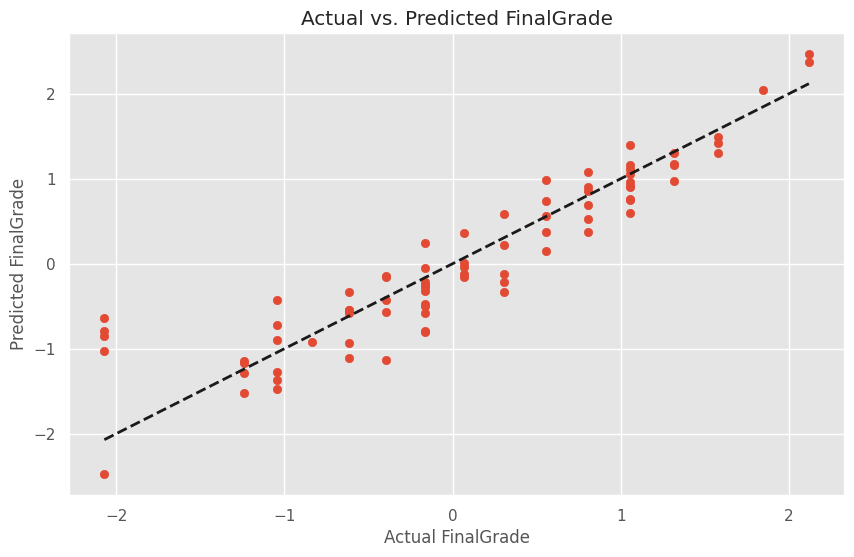

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual FinalGrade')
plt.ylabel('Predicted FinalGrade')
plt.title('Actual vs. Predicted FinalGrade')
plt.show()


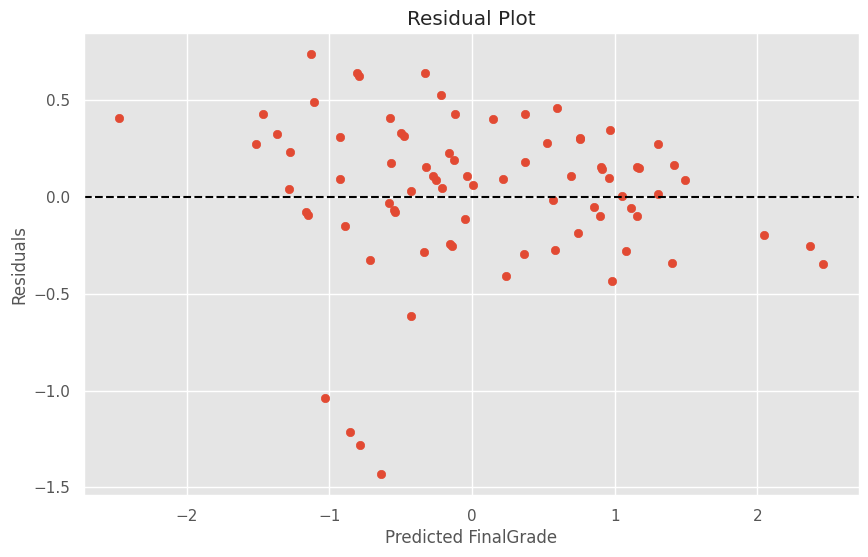

In [ ]:

# Calculate residuals
residuals = y_test - y_pred_test

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted FinalGrade')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Step 8: Linear Regression with 4 Variables

## 8. Validation Split (K fold)

In [ ]:
# prompt: drop all features with less than and equal to 5

# Identify columns with low variation (e.g., fewer than 5 unique values)
low_variation_columns = unique_counts[unique_counts <= 5].index.tolist()

# Drop columns with low variation
df_encoded = df_encoded.drop(columns=low_variation_columns)

# Recalculate the number of unique values for each column
unique_counts = df_encoded.nunique()

# Print the DataFrame after dropping low variance features
df_encoded.head()


Age  SchoolAbsences  FirstPeriodGrade  SecondPeriodGrade  FinalGrade
0  1.041662        0.559227         -1.996956          -1.268999   -1.041743
1  0.338006        0.244999         -1.996956          -1.505855   -1.041743
2 -1.460045        0.975255         -1.214078          -0.769807   -0.166650
3 -1.460045       -0.239555          1.203399           0.887567    1.057130
4 -0.486022        0.244999         -1.591415          -0.241437   -0.166650

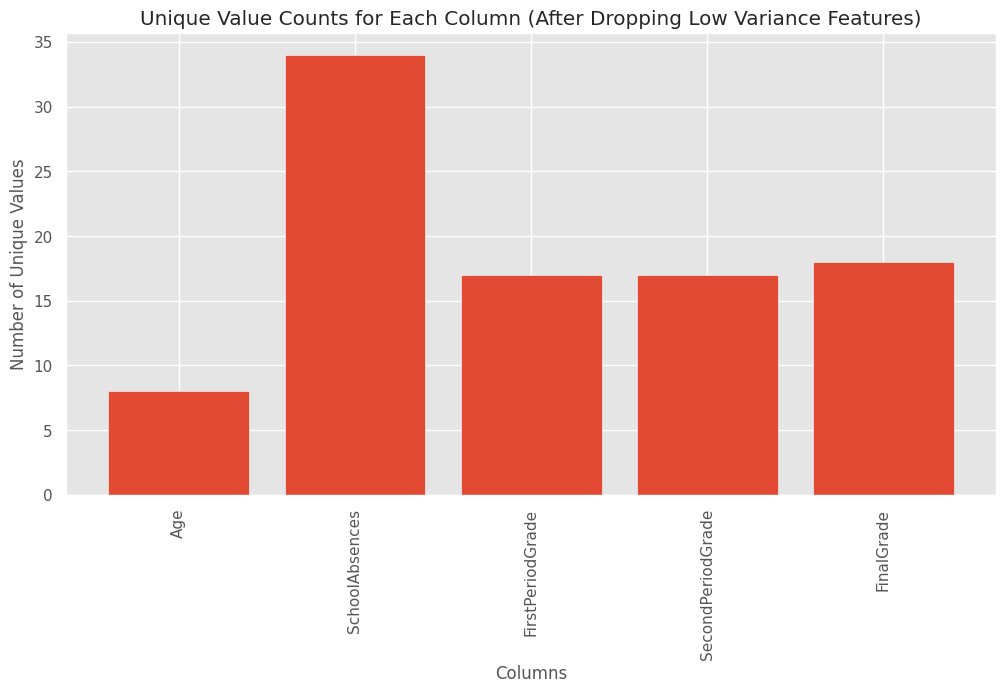

In [ ]:

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")
plt.show()

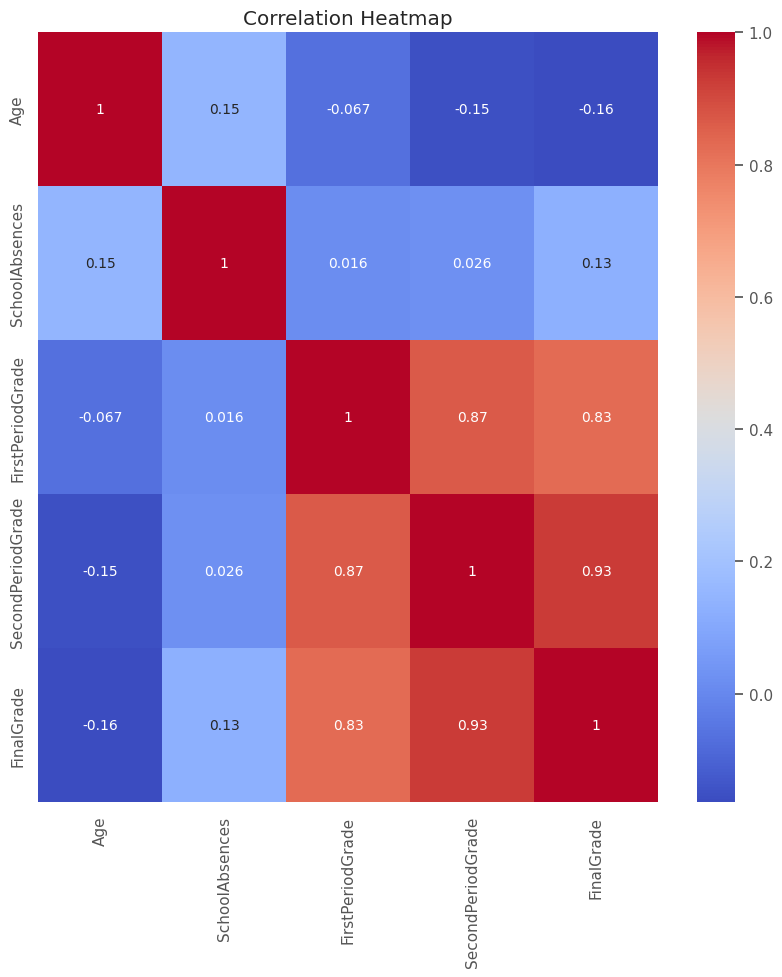

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#  all columns except the last one(target column)
X = df_encoded.iloc[:, :-1].values

# only the averageGrade(target variable)
y = df_encoded.iloc[:, -1].values

In [ ]:
pd.DataFrame(X)

0         1         2         3
0    1.041662  0.559227 -1.996956 -1.268999
1    0.338006  0.244999 -1.996956 -1.505855
2   -1.460045  0.975255 -1.214078 -0.769807
3   -1.460045 -0.239555  1.203399  0.887567
4   -0.486022  0.244999 -1.591415 -0.241437
..        ...       ...       ...       ...
390  2.173195  1.054553 -0.524773 -0.508979
391  0.338006  0.034451  0.941494  1.482986
392  2.632311  0.034451 -0.206213 -0.769807
393  1.041662 -1.313038  0.098101  0.312008
394  1.647556  0.415750 -0.859783 -0.508979

[395 rows x 4 columns]

In [ ]:
pd.DataFrame(y)

0
0   -1.041743
1   -1.041743
2   -0.166650
3    1.057130
4   -0.166650
..        ...
390 -0.395278
391  1.316089
392 -0.833372
393 -0.166650
394 -0.395278

[395 rows x 1 columns]

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold for cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    # Split the training data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Perform model training using X_train_fold and y_train_fold
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Evaluate the model on the validation set
    mse_val = mean_squared_error(y_val_fold, y_pred_val)

    # Print MSE for the current fold
    print(f"Fold {fold + 1} MSE: {mse_val}")

# After k-fold cross-validation, train the final model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# After final model training on the entire training set, make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Calculate RMSE and R² for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print RMSE and R² for the test set
print(f"Test Set RMSE: {rmse_test}")
print(f"Test Set R²: {r2_test}")





Fold 1
Fold 1 MSE: 0.0726254785674722
Fold 2
Fold 2 MSE: 0.1995827841946048
Fold 3
Fold 3 MSE: 0.08737383253286081
Fold 4
Fold 4 MSE: 0.07138964832716414
Fold 5
Fold 5 MSE: 0.16337689479486064
Test Set RMSE: 0.3961983316509491
Test Set R²: 0.8479307565612325


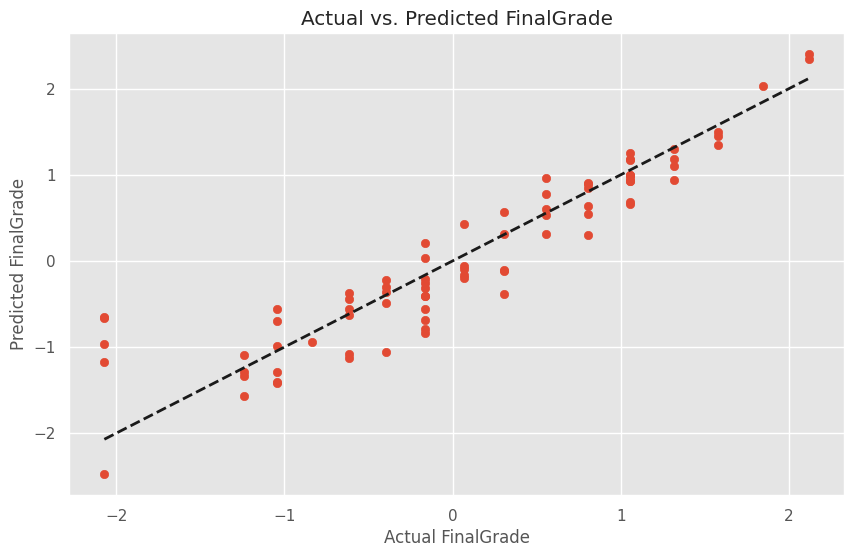

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual FinalGrade')
plt.ylabel('Predicted FinalGrade')
plt.title('Actual vs. Predicted FinalGrade')
plt.show()


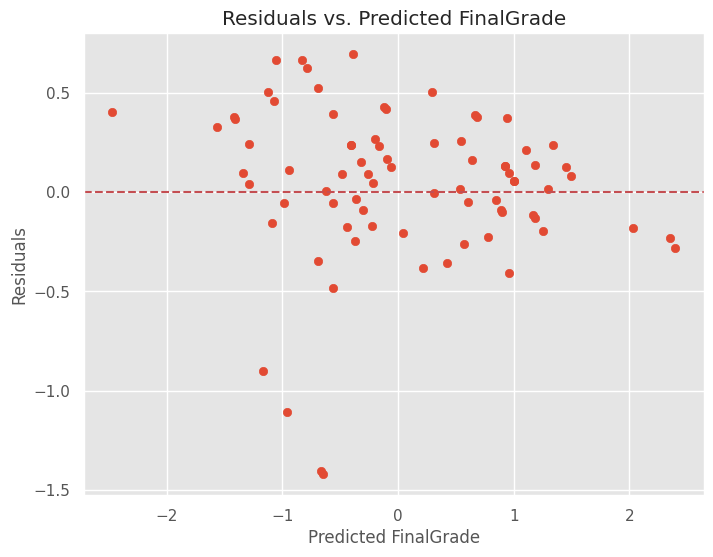

In [ ]:
# prompt: visualize the residual

import matplotlib.pyplot as plt
residuals = y_test - y_pred_test


# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted FinalGrade')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted FinalGrade')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


# Step 9: Linear Regression with 3 Variables

## 8. Validation Split (k fold)


In [ ]:

# Identify columns with low variation (e.g., fewer than 25 unique values)
low_variation_columns = unique_counts[unique_counts <=15].index.tolist()

# Drop columns with low variation
df_encoded = df_encoded.drop(columns=low_variation_columns)

# Recalculate the number of unique values for each column
unique_counts = df_encoded.nunique()

# Print the DataFrame after dropping low variance features
df_encoded.head()


SchoolAbsences  FirstPeriodGrade  SecondPeriodGrade  FinalGrade
0        0.559227         -1.996956          -1.268999   -1.041743
1        0.244999         -1.996956          -1.505855   -1.041743
2        0.975255         -1.214078          -0.769807   -0.166650
3       -0.239555          1.203399           0.887567    1.057130
4        0.244999         -1.591415          -0.241437   -0.166650

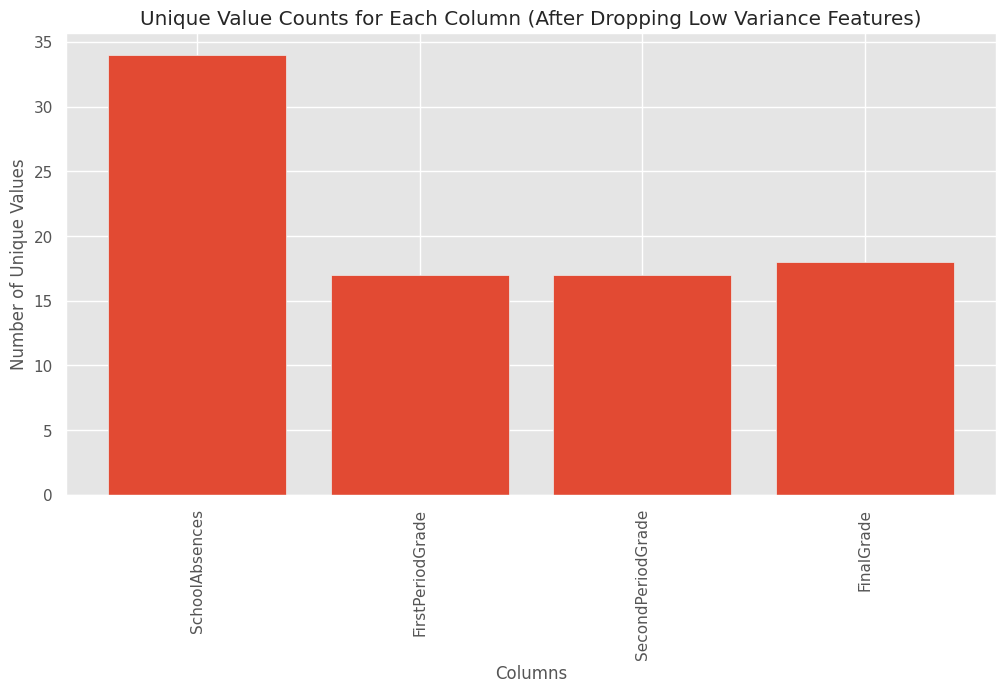

In [ ]:

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")
plt.show()

In [ ]:
#  all columns except the last one(target column)
X = df_encoded.iloc[:, :-1].values

# only the averageGrade(target variable)
y = df_encoded.iloc[:, -1].values

In [ ]:
pd.DataFrame(X)

0         1         2
0    0.559227 -1.996956 -1.268999
1    0.244999 -1.996956 -1.505855
2    0.975255 -1.214078 -0.769807
3   -0.239555  1.203399  0.887567
4    0.244999 -1.591415 -0.241437
..        ...       ...       ...
390  1.054553 -0.524773 -0.508979
391  0.034451  0.941494  1.482986
392  0.034451 -0.206213 -0.769807
393 -1.313038  0.098101  0.312008
394  0.415750 -0.859783 -0.508979

[395 rows x 3 columns]

In [ ]:
pd.DataFrame(y)

0
0   -1.041743
1   -1.041743
2   -0.166650
3    1.057130
4   -0.166650
..        ...
390 -0.395278
391  1.316089
392 -0.833372
393 -0.166650
394 -0.395278

[395 rows x 1 columns]

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold for cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    # Split the training data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Perform model training using X_train_fold and y_train_fold
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Evaluate the model on the validation set
    mse_val = mean_squared_error(y_val_fold, y_pred_val)

    # Print MSE for the current fold
    print(f"Fold {fold + 1} MSE: {mse_val}")

# After k-fold cross-validation, train the final model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# After final model training on the entire training set, make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Calculate RMSE and R² for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print RMSE and R² for the test set
print(f"Test Set RMSE: {rmse_test}")
print(f"Test Set R²: {r2_test}")



Fold 1
Fold 1 MSE: 0.07514138930633027
Fold 2
Fold 2 MSE: 0.20849479944318444
Fold 3
Fold 3 MSE: 0.08790672071597486
Fold 4
Fold 4 MSE: 0.06798137220802389
Fold 5
Fold 5 MSE: 0.16365948312660347
Test Set RMSE: 0.39456076601155765
Test Set R²: 0.8491852229066416


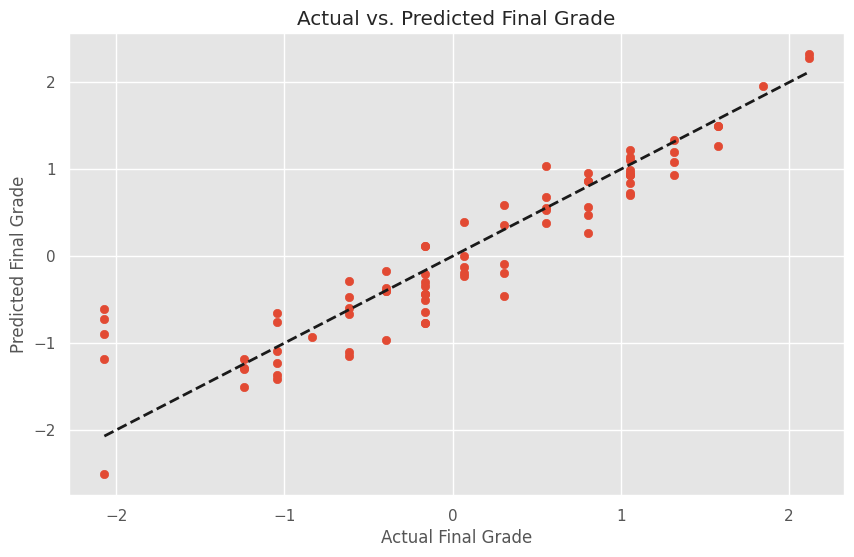

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Actual vs. Predicted Final Grade')
plt.show()


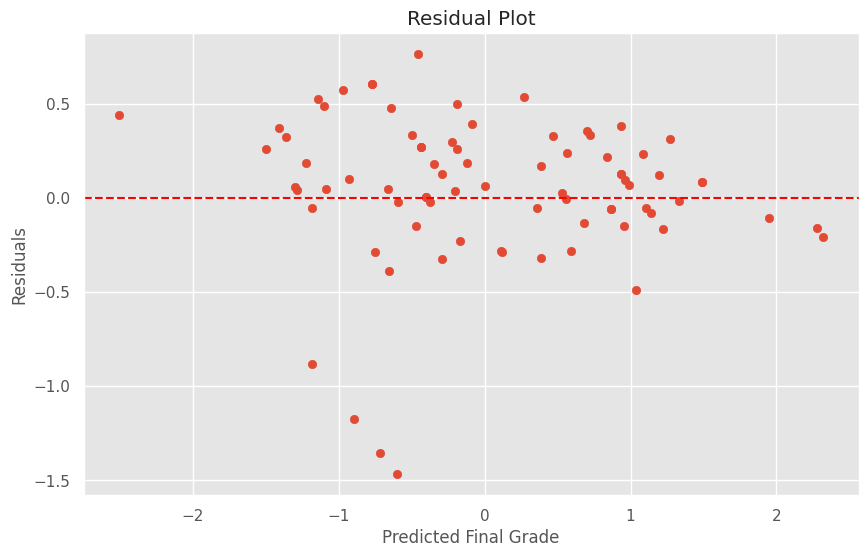

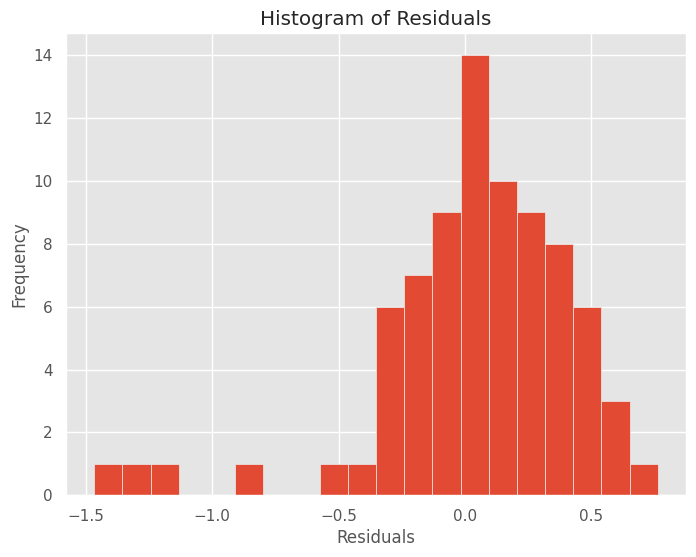

In [ ]:

# Calculate residuals
residuals = y_test - y_pred_test

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Final Grade')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()



# Step 10: Linear Regression Using 2 Variables

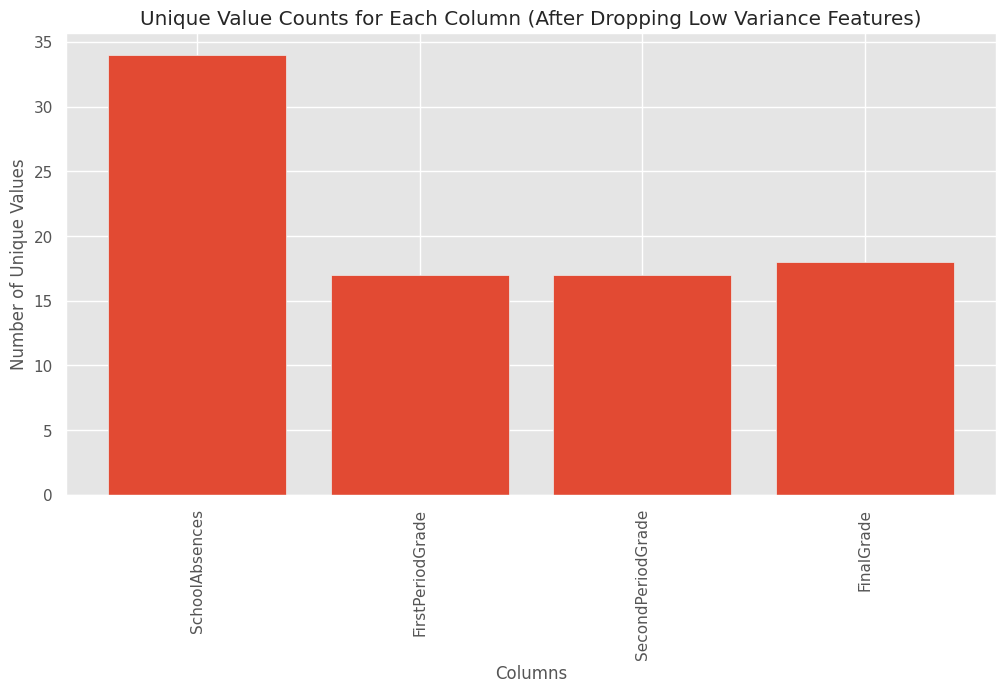

In [ ]:

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")
plt.show()

Text(0.5, 1.0, 'Unique Value Counts for Each Column (After Dropping Low Variance Features)')

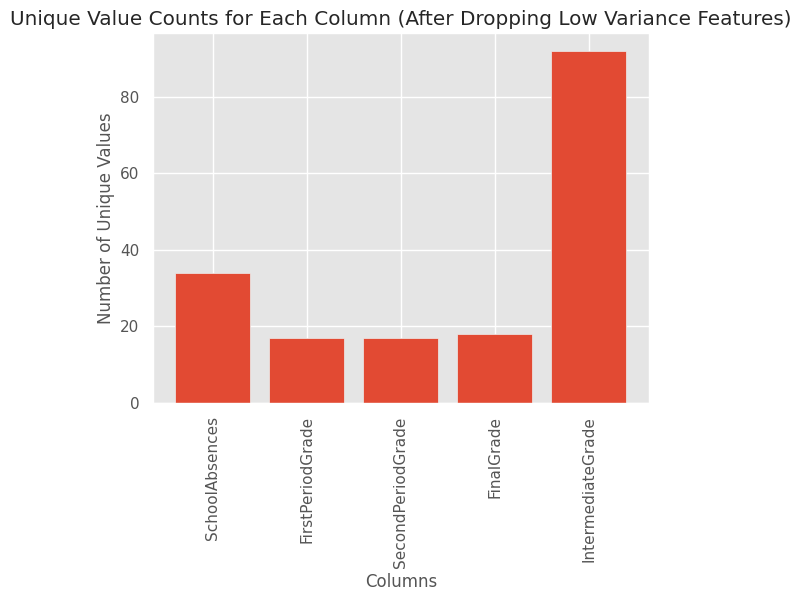

In [ ]:
df_encoded['IntermediateGrade'] = (df_encoded['FirstPeriodGrade'] + df_encoded['SecondPeriodGrade']) / 2
plt.bar(df_encoded.columns, df_encoded.nunique())
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")

In [ ]:
df_encoded = df_encoded.drop(['FirstPeriodGrade', 'SecondPeriodGrade'], axis=1)

Text(0.5, 1.0, 'Unique Value Counts for Each Column (After Dropping Low Variance Features)')

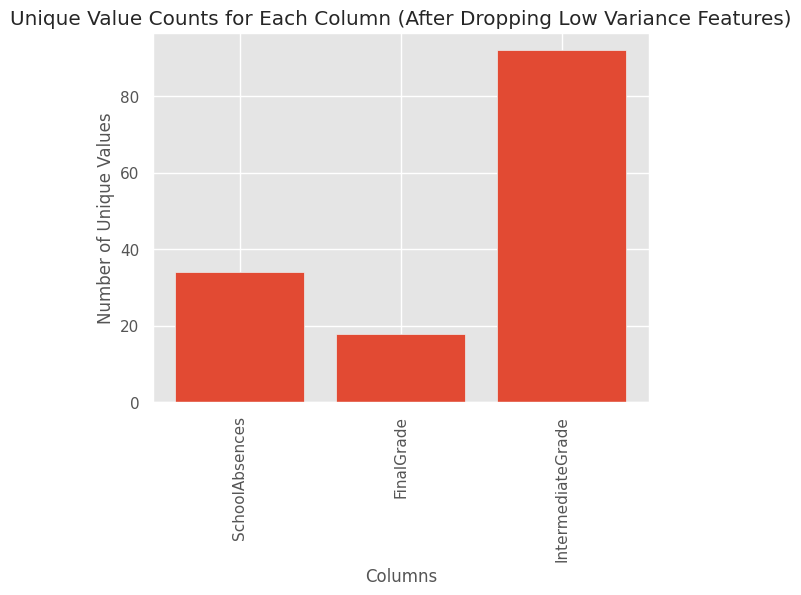

In [ ]:
plt.bar(df_encoded.columns, df_encoded.nunique())
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")

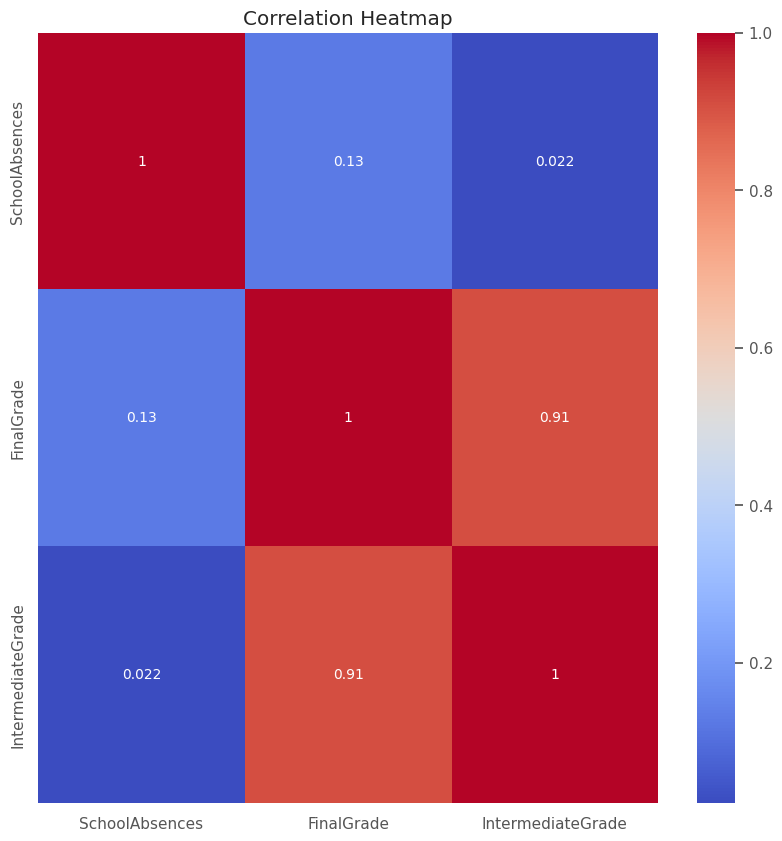

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

X = df_encoded[['SchoolAbsences', 'IntermediateGrade']]

y = df_encoded['FinalGrade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold for cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    # Split the training data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Perform model training using X_train_fold and y_train_fold
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Evaluate the model on the validation set
    mse_val = mean_squared_error(y_val_fold, y_pred_val)

    # Print MSE for the current fold
    print(f"Fold {fold + 1} MSE: {mse_val}")

# After k-fold cross-validation, train the final model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# After final model training on the entire training set, make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Calculate RMSE and R² for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print RMSE and R² for the test set
print(f"Test Set RMSE: {rmse_test}")
print(f"Test Set R²: {r2_test}")


Fold 1
Fold 1 MSE: 0.12031814849178751
Fold 2
Fold 2 MSE: 0.24854466973154524
Fold 3
Fold 3 MSE: 0.12738062614647716
Fold 4
Fold 4 MSE: 0.11075619173030078
Fold 5
Fold 5 MSE: 0.17556909715027405
Test Set RMSE: 0.4312834008582865
Test Set R²: 0.8198054766731973


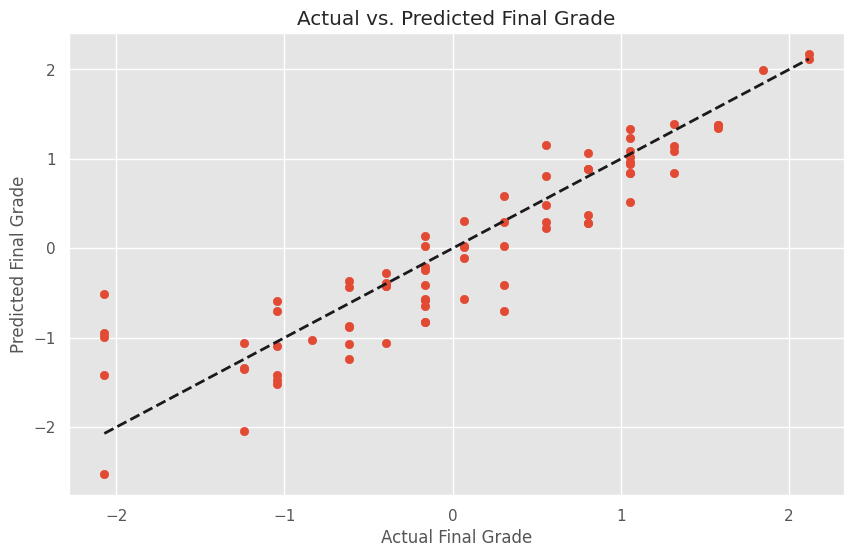

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Actual vs. Predicted Final Grade')
plt.show()


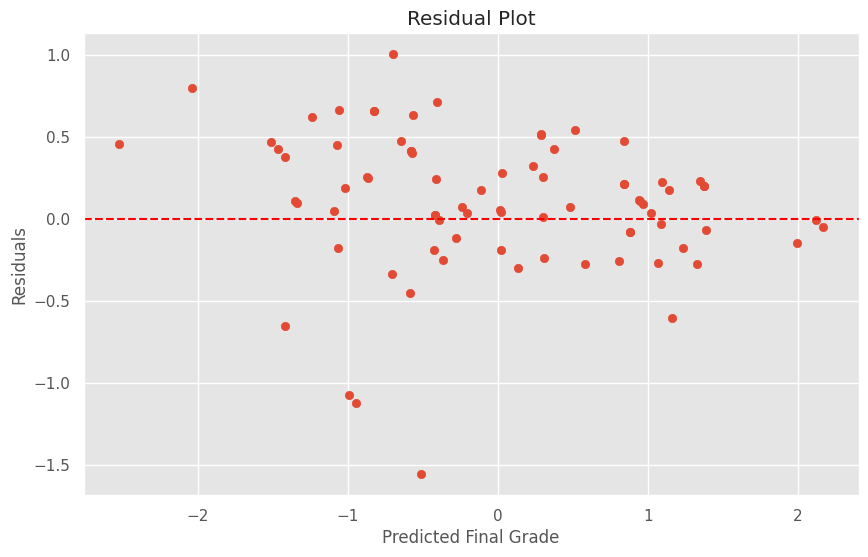

In [ ]:

# Calculate residuals
residuals = y_test - y_pred_test

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Final Grade')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Step 11: Linear Regression  With 1 Variable

Text(0.5, 1.0, 'Unique Value Counts for Each Column (After Dropping Low Variance Features)')

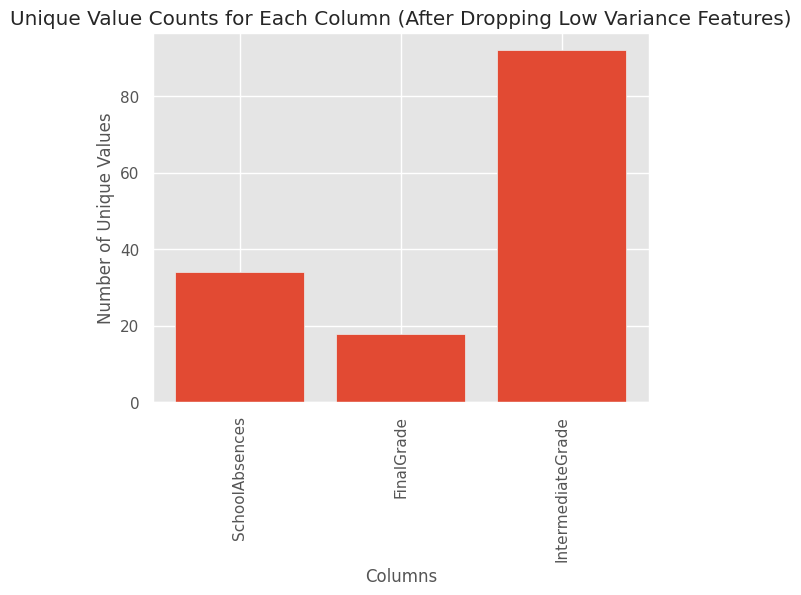

In [ ]:
plt.bar(df_encoded.columns, df_encoded.nunique())
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")

In [ ]:


df_encoded = df_encoded.drop(['SchoolAbsences'], axis=1)


Text(0.5, 1.0, 'Unique Value Counts for Each Column (After Dropping Low Variance Features)')

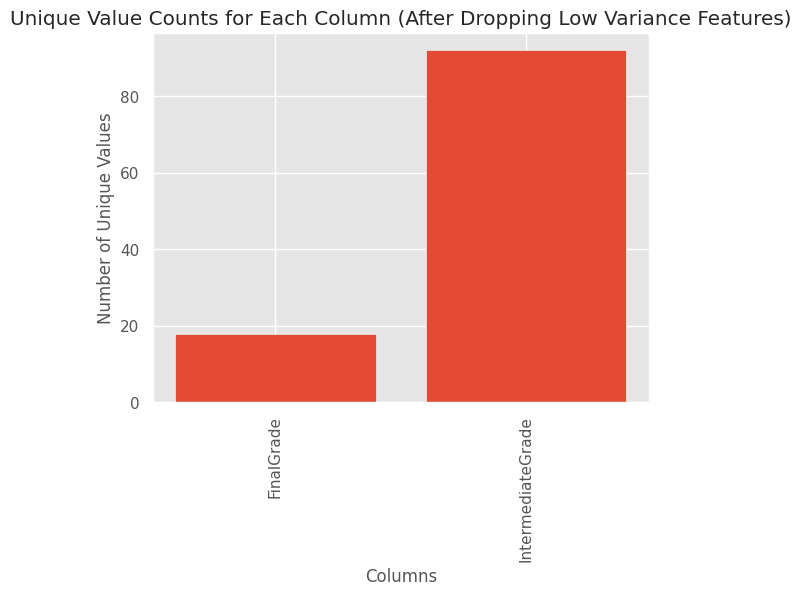

In [ ]:
plt.bar(df_encoded.columns, df_encoded.nunique())
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column (After Dropping Low Variance Features)")

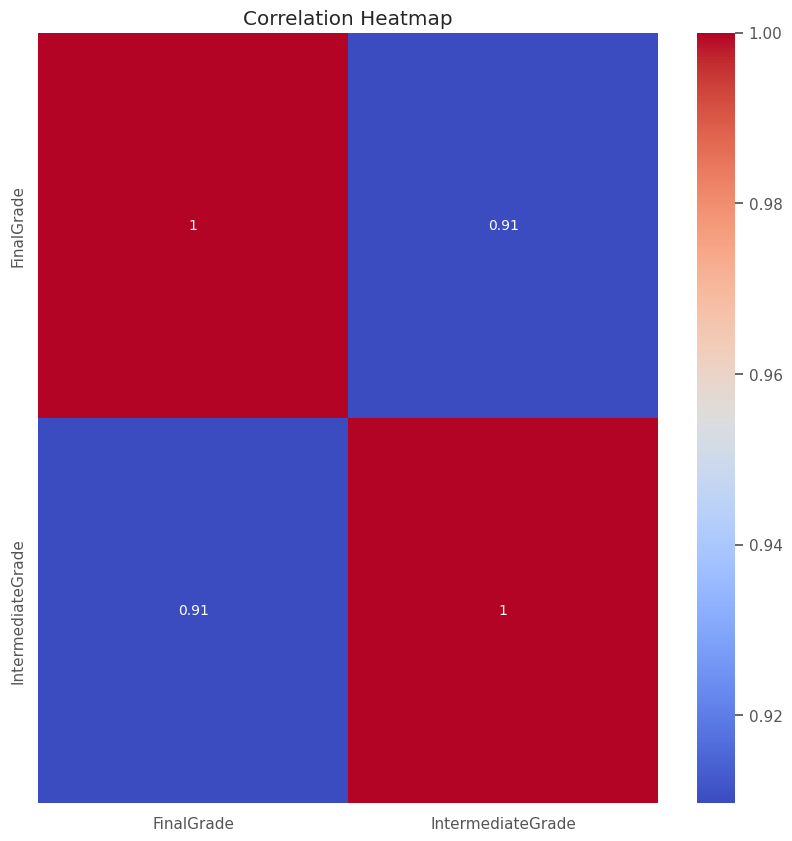

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

X = df_encoded[['IntermediateGrade']]

y = df_encoded['FinalGrade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each fold for cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    # Split the training data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Perform model training using X_train_fold and y_train_fold
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_fold)

    # Evaluate the model on the validation set
    mse_val = mean_squared_error(y_val_fold, y_pred_val)

    # Print MSE for the current fold
    print(f"Fold {fold + 1} MSE: {mse_val}")

# After k-fold cross-validation, train the final model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# After final model training on the entire training set, make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Calculate RMSE and R² for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print RMSE and R² for the test set
print(f"Test Set RMSE: {rmse_test}")
print(f"Test Set R²: {r2_test}")


Fold 1
Fold 1 MSE: 0.13171442547085188
Fold 2
Fold 2 MSE: 0.2722687140704617
Fold 3
Fold 3 MSE: 0.133752255788657
Fold 4
Fold 4 MSE: 0.11558142312017355
Fold 5
Fold 5 MSE: 0.19517170639893763
Test Set RMSE: 0.43687983078867065
Test Set R²: 0.8150986461656305


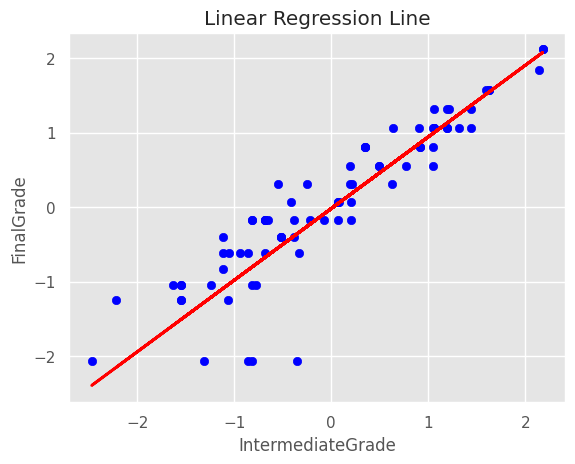

In [ ]:

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_test, color='red', linewidth=2)
plt.xlabel('IntermediateGrade')
plt.ylabel('FinalGrade')
plt.title('Linear Regression Line')
plt.show()


# Step 12: Summarizing And Analyzing The Results

In [ ]:


# Define the data
data = {
    "Number of Features": ["12 Features", "4 Features", "3 Features", "2 Features", "1 Feature"],
    "Fold 1 MSE": [0.08698, 0.07263, 0.07514, 0.12032, 0.13171],
    "Fold 2 MSE": [0.18649, 0.19958, 0.20849, 0.24854, 0.27227],
    "Fold 3 MSE": [0.09316, 0.08737, 0.08791, 0.12738, 0.13375],
    "Fold 4 MSE": [0.07193, 0.07139, 0.06798, 0.11076, 0.11558],
    "Fold 5 MSE": [0.15125, 0.16338, 0.16366, 0.17557, 0.19517],
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Calculate the Average MSE
results_df["Average MSE"] = results_df.iloc[:, 1:6].mean(axis=1)

# Define test set results
test_set_results = {
    "Test Set RMSE": [0.40426, 0.39620, 0.39456, 0.43128, 0.43688],
    "Test Set R²": [0.84168, 0.84793, 0.84919, 0.81981, 0.81510],
}

# Create a DataFrame for test set results
test_set_df = pd.DataFrame(test_set_results)

# Concatenate the two DataFrames
final_results_df = pd.concat([results_df, test_set_df], axis=1)

# Display the final DataFrame
final_results_df


Number of Features  Fold 1 MSE  Fold 2 MSE  Fold 3 MSE  Fold 4 MSE  \
0        12 Features     0.08698     0.18649     0.09316     0.07193   
1         4 Features     0.07263     0.19958     0.08737     0.07139   
2         3 Features     0.07514     0.20849     0.08791     0.06798   
3         2 Features     0.12032     0.24854     0.12738     0.11076   
4          1 Feature     0.13171     0.27227     0.13375     0.11558   

   Fold 5 MSE  Average MSE  Test Set RMSE  Test Set R²  
0     0.15125     0.117962        0.40426      0.84168  
1     0.16338     0.118870        0.39620      0.84793  
2     0.16366     0.120636        0.39456      0.84919  
3     0.17557     0.156514        0.43128      0.81981  
4     0.19517     0.169696        0.43688      0.81510

# **Conclusion**

The analysis of the linear regression models demonstrates that the inclusion of relevant features significantly enhances predictive performance, as observed in the results from various combinations of variables. The models utilizing 12 and 4 features yielded the lowest average MSE and high R² values, indicating strong explanatory power in relation to the target variable. Notably, the 4-feature model, comprising Age, School Absences, First Period Grade, and Second Period Grade, emerged as the most balanced option, effectively capturing the complexities of the data without overfitting. Conversely, the use of only one or two features resulted in diminished performance, underscoring the importance of selecting a thoughtful combination of variables that reflect the underlying relationships within the dataset. Thus, the findings highlight the critical role of feature selection in improving model accuracy and robustness in predictive analytics.